## Jonathan Alexis Urrutia Anguiano 414011025
### Física computacional
### Ricardo Méndez
# Tarea Examen 1 

# Ejercicio 1

In [121]:
from numpy import *
from pylab import *
%matplotlib inline

Tenemos que la ecuación de movimiento de un oscilador  en dos dimensiones considerando una fricción $f_{fr} = f_{fr}\left(\dot{\vec r}\right)$, es la siguiente:

$$
m \ddot{\vec r} = - k \vec r + f_{fr}\left(\dot{\vec r}\right)
$$

Se tomará

$$
f_{fr}\left(\dot{\vec r}\right) =
\left\{ \begin{array}{c c}
-\gamma \dot {\vec r}  &  \mbox{si } |\dot{\vec r}|<1 \\
-\mu |\dot{\vec r}|^{1/2} \dot {\vec r} &  \mbox{si } |\dot{\vec r}|>1 \\
\end{array}\right.
$$

Este problema se resolvera tanto en coordenadas cartesianas como en polares.

### a,i) Ec. de movimeinto en cartesianas

Como $\vec r = x \hat{e_x} + y \hat{e_y},\, \dot{\vec r} = \dot x \hat{e_x} + \dot y \hat{e_y}\mbox{ y }\ddot{\vec r} = \ddot x \hat{e_x} + \ddot y \hat{e_y} $

$$ 
\begin{array}{c c r}
\mbox{Si } \dot x^2 + \dot y ^2 < 1\\
& m \ddot x = -k x - \gamma \dot x & \mbox{en } \hat{e_x} \\
& m \ddot y = -k y - \gamma \dot y &  \mbox{en } \hat{e_y}\\
\mbox{Si } \dot x^2 + \dot y ^2 > 1\\
&  m \ddot x = -k x - \mu (\dot x^2 + \dot y ^2)^{1/4}\dot x &  \mbox{en } \hat{e_x} \\
 &  m \ddot y = -k y - \mu (\dot x^2 + \dot y ^2)^{1/4}\dot y &  \mbox{en } \hat{e_y}
\end{array}
$$

Haciendo los cambios de variables $u_1 = x,\,v_1=y,\,u_2 = \dot x\mbox{ y }v_2 = \dot y$, el sistema a ecuaciones  a resolver es el siguiente:

\begin{align}
\mbox{Si } u_2^2 + v_2^2< 1 & & \mbox{Si } u_2^2 + v_2^2> 1 \\  \\
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ -\frac{k}{m} u_1 -\frac{\gamma}{m} u_2 \\ -\frac{k}{m} v_1 -\frac{\gamma}{m} v_2 
\end{array}\right) 
&  &
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ -\frac{k}{m} u_1 -\frac{\mu}{m} (u_2^2 + v_2^2)^{1/4}u_2 \\ -\frac{k}{m} v_1 -\frac{\mu}{m} (u_2^2 + v_2^2)^{1/4}v_2 
\end{array}\right)
\end{align}


In [2]:
def resorte_cartesianas(x, t, m = 1., k=1., gamma = .1, mu = .2):  #x = [x,y,vx,vy]
    
    u1, v1, u2, v2 = x[0], x[1], x[2], x[3]  
    norm_vel = sqrt(u2**2 + v2**2) 
    du1, dv1 = u2, v2
    
    if norm_vel <= 1:
        du2 = -(k/m)*u1 - (gamma/m)*u2
        dv2 = -(k/m)*v1 - (gamma/m)*v2
    else:
        du2 = -(k/m)*u1 - (mu/m)*sqrt(norm_vel)*u2
        dv2 = -(k/m)*v1 -  (mu/m)*sqrt(norm_vel)*v2
    return array([du1, dv1, du2, dv2])

### a,ii)  Ec. de movimeinto en polares

Sean $\hat{e_r} = \cos\theta \hat{e_x} + \sin\theta \hat{e_y},\, \hat{e_\theta} = -\sin\theta \hat{e_x} + \cos\theta \hat{e_y} \mbox{ y } r =\sqrt{x^2+y^2}$. 
Entonces
$\vec r = r \hat{e_r},\, \dot{\vec r} =\dot r \hat{e_r} + r\dot \theta \hat{e_\theta}\mbox{ y }\ddot{\vec r} = (\ddot r-r\dot\theta^2) \hat{e_r}+(2\dot r\dot\theta+r\ddot\theta) \hat{e_\theta}  $

$$ 
\begin{array}{c c r}
\mbox{Si } {\dot r}^2+ r^2\dot\theta^2 < 1\\
& m (\ddot r-r\dot\theta^2) = -k r - \gamma \dot r & \mbox{en } \hat{e_r} \\
& m (2\dot r\dot\theta+r\ddot\theta) = - \gamma r\dot\theta &  \mbox{en } \hat{e_\theta}\\
\mbox{Si } {\dot r}^2+ r^2\dot\theta^2 > 1\\
& m (\ddot r-r\dot\theta^2) = -k r - \mu ({\dot r}^2+ r^2\dot\theta^2)^{1/4} \dot r & \mbox{en } \hat{e_r} \\
& m (2\dot r\dot\theta+r\ddot\theta) = - \mu ({\dot r}^2+ r^2\dot\theta^2)^{1/4}  r\dot\theta &  \mbox{en } \hat{e_\theta}
\end{array}
$$

Haciendo los cambios de variables $u_1 = r,\,v_1=\theta,\,u_2 = \dot r\mbox{ y }v_2 = \dot \theta$, el sistema a ecuaciones  a resolver es el siguiente:

\begin{align}
\mbox{Si } u_2^2+ u_1^2 v_2^2 < 1& & \mbox{Si } u_2^2+ u_1^2 v_2^2  > 1 \\  \\
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ ( v_2^2-\frac{k}{m}) u_1 -\frac{\gamma}{m} u_2 \\ -(2\frac{ u_2}{u_1}+\frac{\gamma}{m}) v_2 
\end{array}\right) 
&  &
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ ( v_2^2-\frac{k}{m}) u_1 -\frac{\mu}{m}((u_2^2+ u_1^2 v_2^2)^{1/4}) u_2 \\ -(2\frac{ u_2}{u_1}+\frac{\mu}{m}(u_2^2+ u_1^2 v_2^2)^{1/4}) v_2 
\end{array}\right) 
\end{align}


In [3]:
def resorte_polares(r, t, m = 1., k= 1., gamma = .1, mu = .2):  #r = [r, theta, dot r, dot theta]
    u1, v1, u2, v2 = r[0], r[1], r[2], r[3]  
    norm_vel = sqrt(u2**2 +(u1*v2)**2) 
    du1, dv1 = u2, v2
        
    if u1 != 0 and norm_vel <= 1:
        du2 = (v2*v2-(k/m))*u1 - (gamma/m)*u2
        dv2 = -(2*(u2/u1)+(gamma/m))*v2
    elif u1 != 0 and norm_vel > 1:
        du2 = (v2**2-(k/m))*u1 -(mu/m)*sqrt(norm_vel)*u2
        dv2 = -(2*(u2/u1)+(gamma/m)*sqrt(norm_vel))*v2
    elif u1 == 0 and norm_vel <= 1:
        du2 = (v2*v2-(k/m))*u1 - (gamma/m)*u2
        dv2 = 0
    else:
        du2 = (v2**2-(k/m))*u1 -(mu/m)*sqrt(norm_vel)*u2
        dv2 = 0        
        
    return array([du1, dv1, du2, dv2])

### b) Encontrar las soluciones en $\vec r_0 = (0,1)$ y $\dot{\vec r_0} = (\cos\theta,\sin\theta)$  donde $\theta = n \pi /6$ con $n = 0,  1,2,...,11$

Para la primera condición se utilizará en cartesianas y en las demás se usará en polares. Se utilizará el método de Runge-Kutta para encontrar las soluciones.

In [163]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    #if (x[1]-x[0]) <= 5.*h:
    while (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

### Espacio Físico

Primero mostremos cómo se ve la trayectoria de la partícula  en el espacio real. Primero mostraremos todas las trayectorias en un mismo plano y luego se grafixarán cada una de ellas de forma individual.

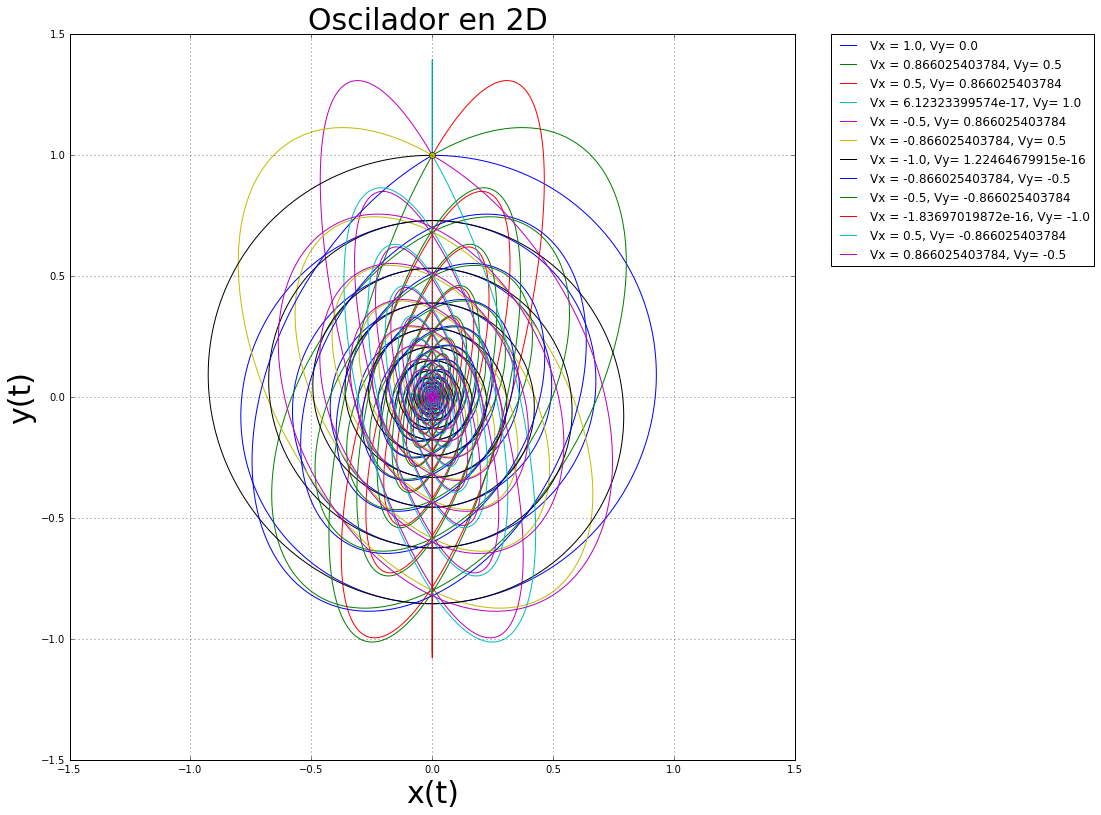

In [5]:
ang = arange(0,12,1)*pi/6
t_f = 100

fig, ax = plt.subplots(figsize=(13, 13))
grid(True)
title(r'Oscilador en 2D ',fontsize = 30),xlabel('x(t)',fontsize=30),ylabel('y(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    plot(sol_c[:,0], sol_c[:,1], label = 'Vx = %s, Vy= %s' %(cos(a),sin(a)))
plot(0,1,'o')
ax.set_aspect('equal', 'datalim')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

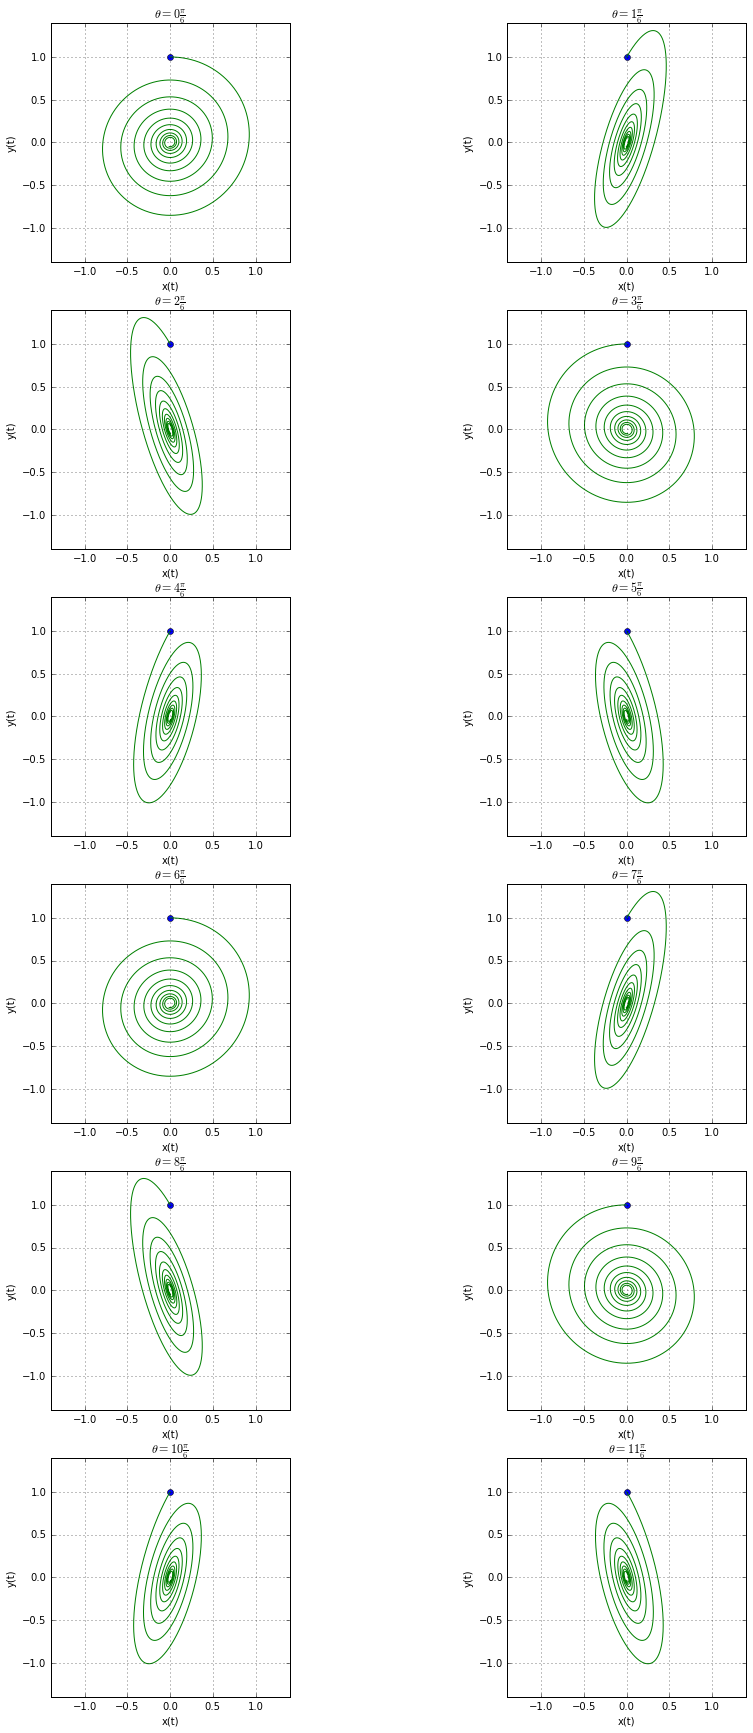

In [17]:
ang = arange(0,12,1)*pi/3
fig, ax = plt.subplots(figsize=(15, 30))
zoom = 1.4
for i in xrange(len(ang)):
    cond_ini = [0,1,cos(ang[i]),sin(ang[i])]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    
    subplot(6,2,i+1,aspect='equal')
    xlim([-zoom,zoom]),ylim([-zoom,zoom])
    grid(True), title(r"$ \theta = "+str(i)+"\\frac{\pi}{6} $" ),xlabel('x(t)'),ylabel('y(t)')
    plot(0,1,'o')
    plot(sol_c[:,0], sol_c[:,1], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    
show()

### Espacio face en la componente X

Una vez más, se muestran todas las trayectorias juntas y luego se hace de forma separada.

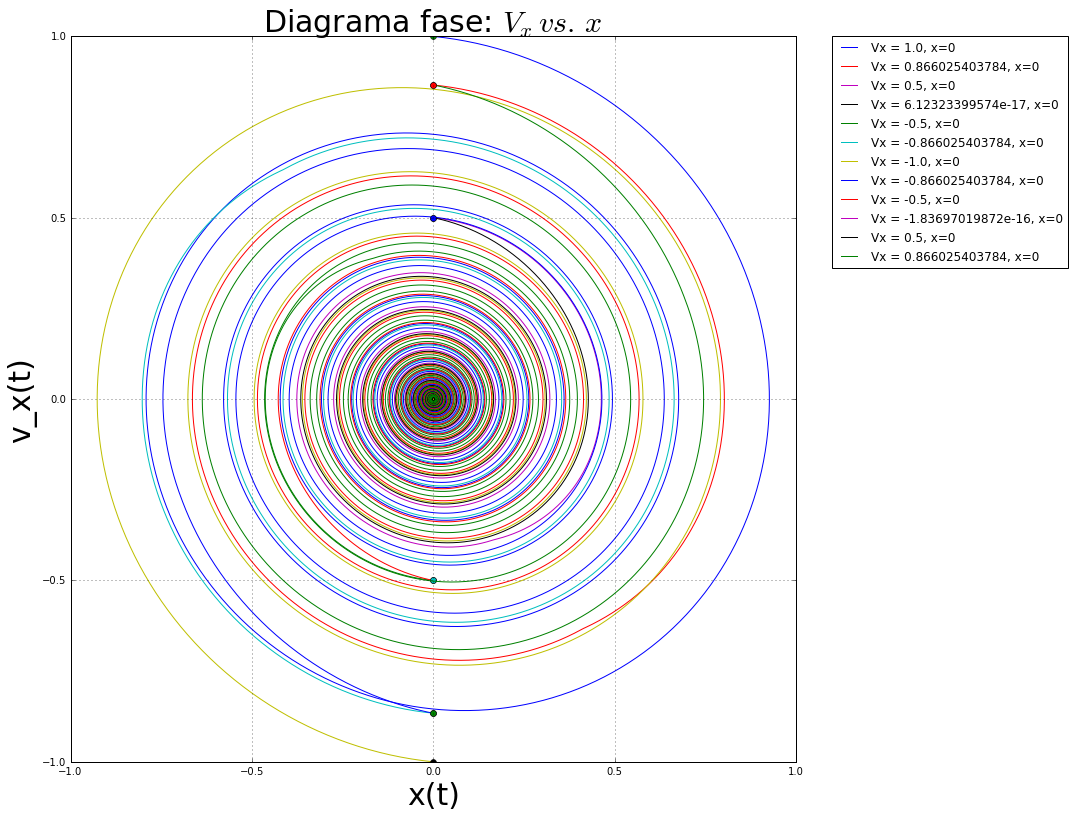

In [7]:
ang = arange(0,12,1)*pi/6
t_f = 100

fig, ax = plt.subplots(figsize=(13, 13))
grid(True)
title(r'Diagrama fase: $V_x\,vs.\,x$ ',fontsize = 30),xlabel('x(t)',fontsize=30),ylabel('v_x(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    plot(sol_c[:,0], sol_c[:,2], label = 'Vx = %s, x=0' %(cos(a)))
    plot(0,cos(a),'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

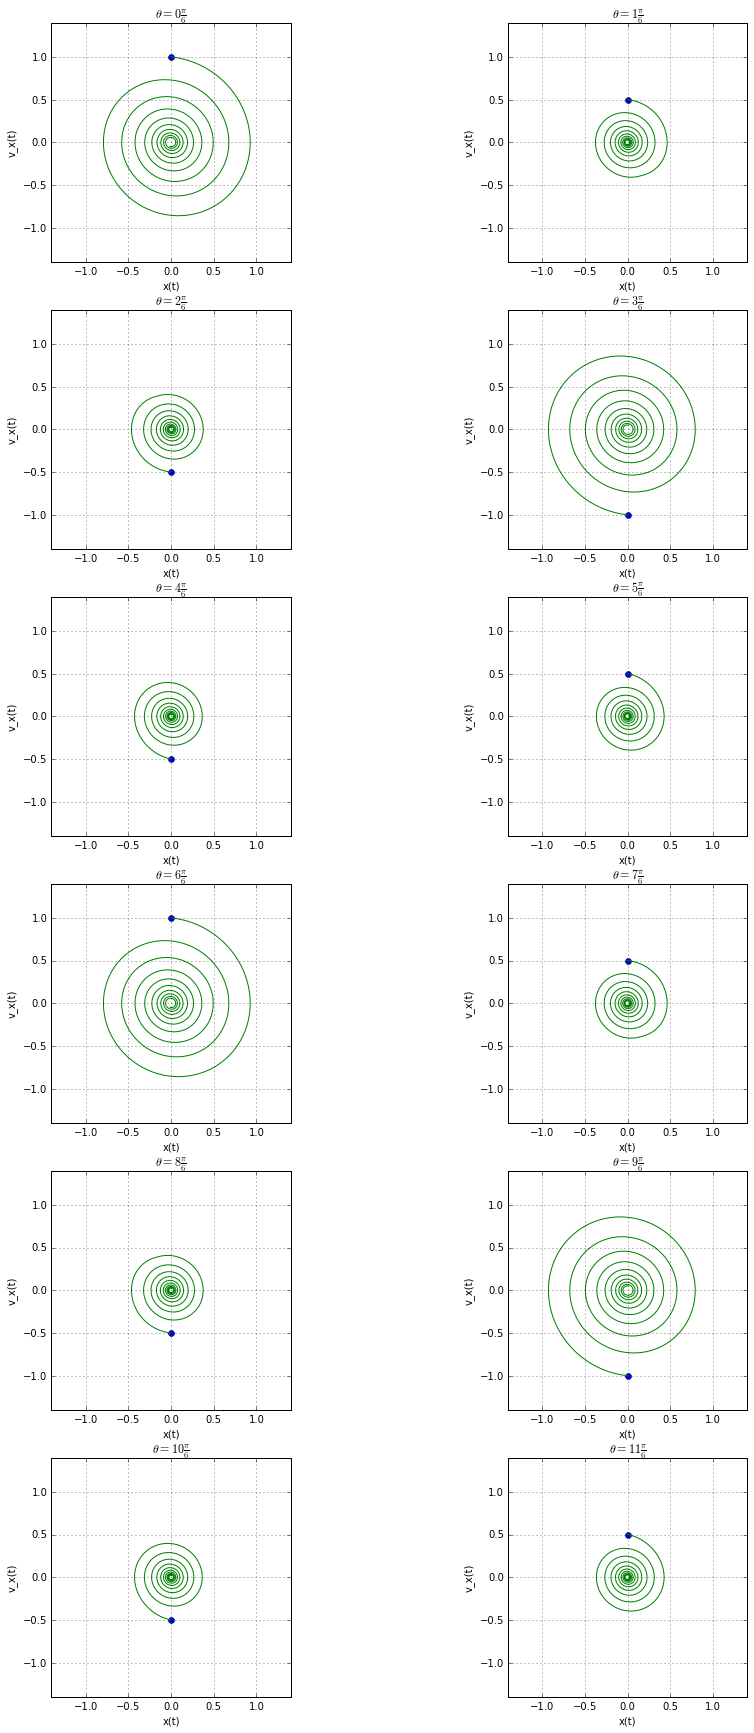

In [21]:
fig, ax = plt.subplots(figsize=(15, 30))
zoom = 1.4
for i in xrange(len(ang)):
    cond_ini = [0,1,cos(ang[i]),sin(ang[i])]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    
    subplot(6,2,i+1,aspect='equal')
    xlim([-zoom,zoom]),ylim([-zoom,zoom])
    grid(True), title(r"$ \theta = "+str(i)+"\\frac{\pi}{6} $" ),xlabel('x(t)'),ylabel('v_x(t)')
    plot(0,cos(ang[i]),'o')
    plot(sol_c[:,0], sol_c[:,2], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")

show()

### Espacio face en la componente Y

Una vez más, se muestran todas las trayectorias juntas y luego se hace de forma separada.

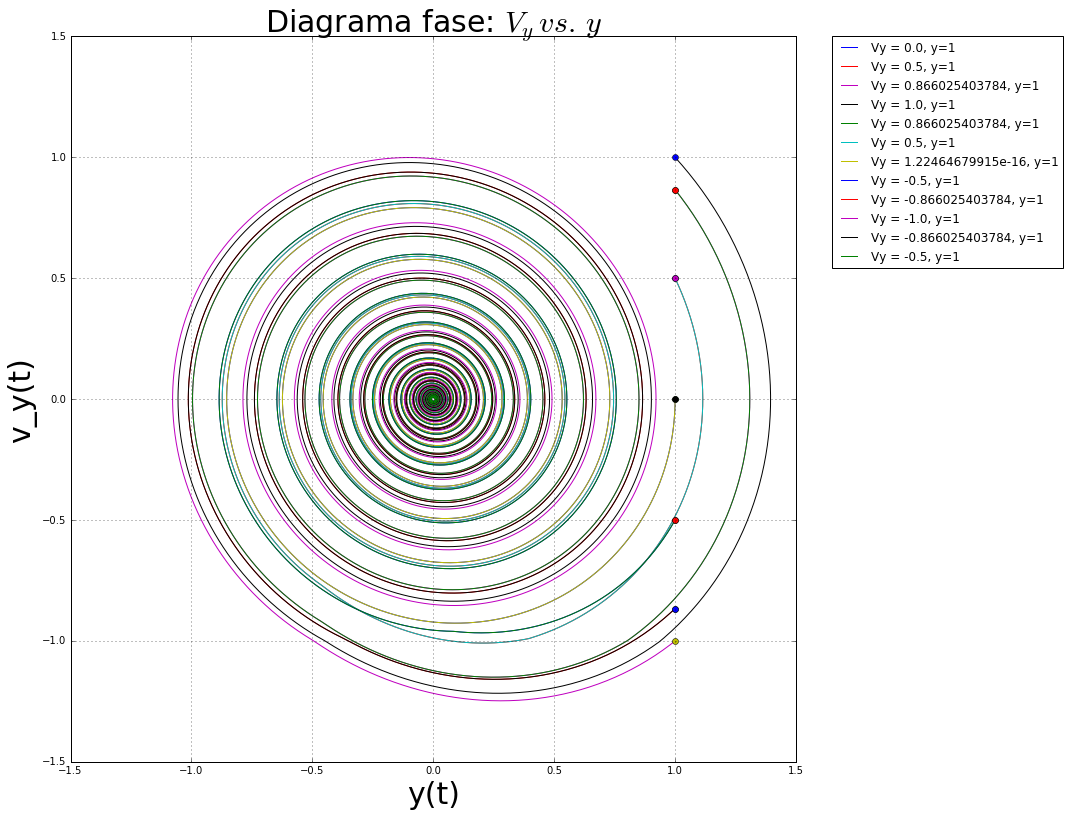

In [23]:
ang = arange(0,12,1)*pi/6
t_f = 100

fig, ax = plt.subplots(figsize=(13, 13))
grid(True)
title(r'Diagrama fase: $V_y\,vs.\,y$',fontsize = 30),xlabel('y(t)',fontsize=30),ylabel('v_y(t)',fontsize = 30)
for a in ang:
    cond_ini = [0,1,cos(a),sin(a)]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    plot(sol_c[:,1], sol_c[:,3], label = 'Vy = %s, y=1' %(sin(a)))
    plot(1,sin(a),'o')
xlim (-1.5,1.5), ylim(-1.5,1.5)  
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

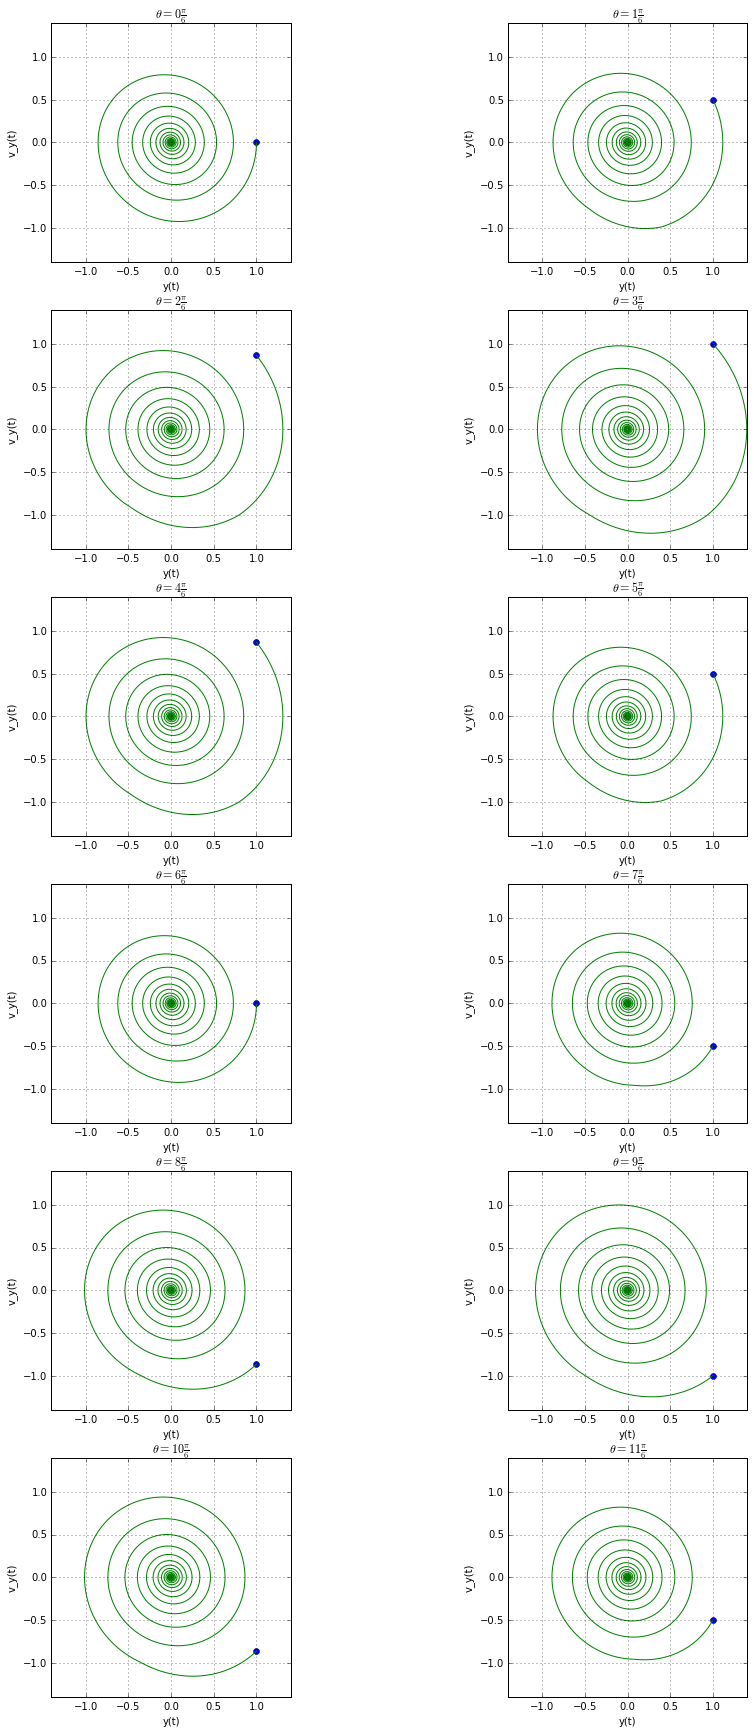

In [26]:
fig, ax = plt.subplots(figsize=(15, 30))
zoom = 1.4
for i in xrange(len(ang)):
    cond_ini = [0,1,cos(ang[i]),sin(ang[i])]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    
    subplot(6,2,i+1,aspect='equal')
    xlim([-zoom,zoom]),ylim([-zoom,zoom])
    grid(True),  title(r"$ \theta = "+str(i)+"\\frac{\pi}{6} $"),xlabel('y(t)'),ylabel('v_y(t)')
    plot(1,sin(ang[i]),'o')
    plot(sol_c[:,1], sol_c[:,3], label = 'Vy= %s' %(sin(ang[i])))
    
show()

## Espacio físico en coordenadas polares

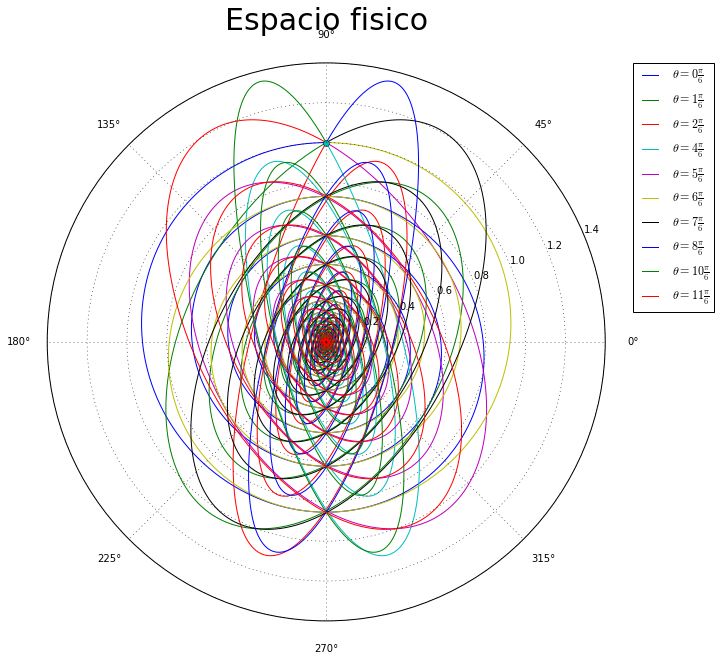

In [64]:
ang = arange(0,12,1)*pi/6
t_f = 100

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='polar')
title(r"Espacio fisico",fontsize = 30)
grid(True)
for i in xrange(len(ang)):
    if abs(ang[i]%pi) != pi/2:
        cond_ini = [1,pi/2, -sin(ang[i]) ,cos(ang[i])]
        t_p, sol_p = rk4(resorte_polares, cond_ini, [0,t_f])
        ax.plot(sol_p[:,1], sol_p[:,0], linewidth=1, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
plot(pi/2,1,'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

## Espacio fase en coordenadas polares

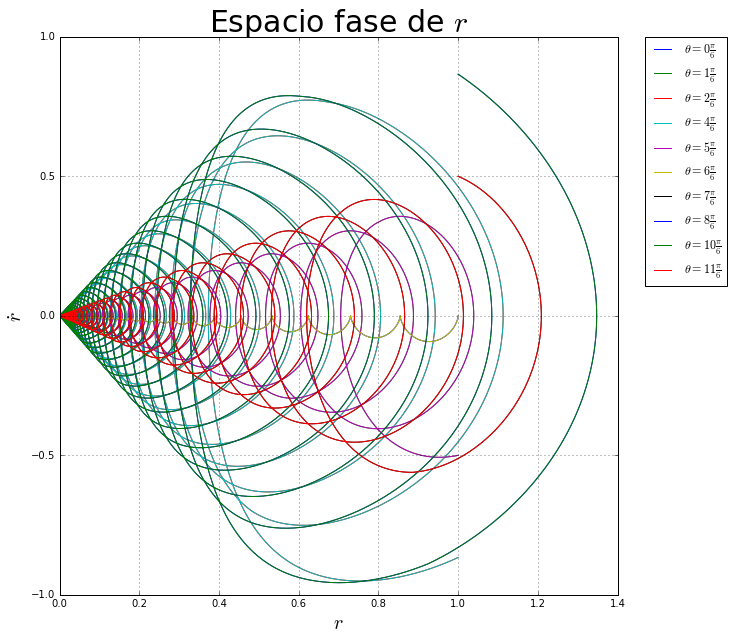

In [220]:
ang = arange(0,12,1)*pi/6
t_f = 100

fig = figure(figsize=(10,10))
ax = fig.add_subplot(111)
title(r"Espacio fase de $r$",fontsize = 30), xlabel(r'$r$',fontsize = 20), ylabel(r'$\dot r$',fontsize = 20) 
grid(True)
for i in xrange(len(ang)):
    if abs(ang[i]%pi) != pi/2:
        cond_ini = [1,pi/2, -sin(ang[i]) ,cos(ang[i])]
        t_c, sol_p = rk4(resorte_polares, cond_ini, [0,t_f])
        ax.plot(sol_p[:,0], sol_p[:,2], linewidth=1, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

### La Energía y el momento angular

La energía la definiremos como 
$$ U = \frac{|\vec p|^2}{2 m} - \frac12 k r^2 $$
La componente $z$ del momento angular es
$$ L_z = x p_y - y p_x  $$

Por simplicidad, rtodos los calculor se harán en cartesianas.

In [50]:
def Energia(x_p,k =1.):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E = 0.5*(px*px + py*py) + 0.5*k* (x*x + y*y)
    return E

def L_z(x_p):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    L = x*py - y*px
    return L

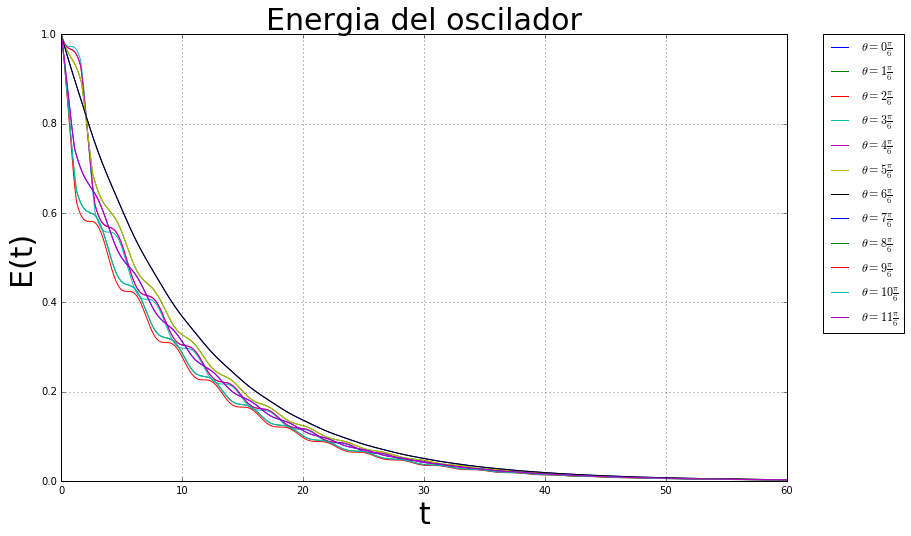

In [52]:
ang = arange(0,12,1)*pi/6
t_f = 60

fig, ax = plt.subplots(figsize=(13, 8))
grid(True)
title(r'Energia del oscilador',fontsize = 30),xlabel('t',fontsize=30),ylabel('E(t)',fontsize = 30)

for i in range(len(ang)):
    cond_ini = [0,1,cos(ang[i]),sin(ang[i])]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    E = Energia(sol_c)
    plot(t_c, E, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

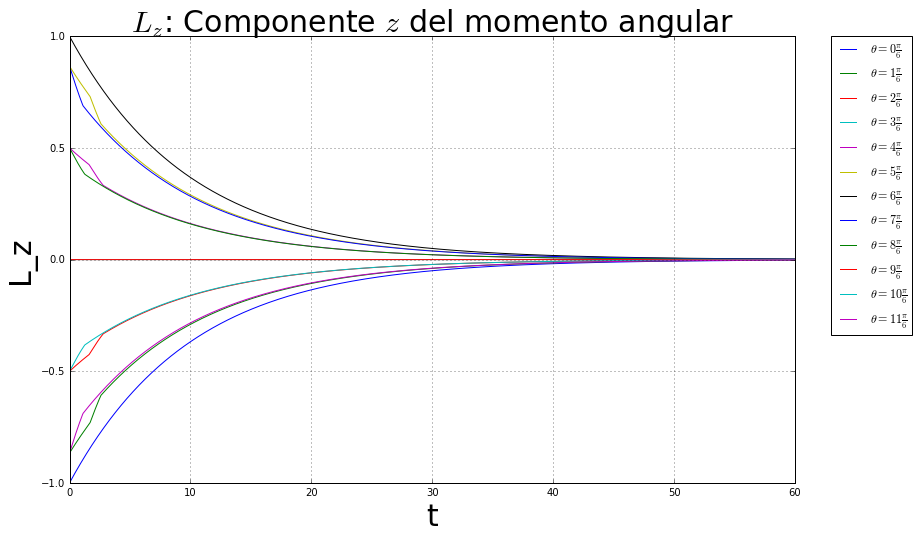

In [53]:
ang = arange(0,12,1)*pi/6
t_f = 60

fig, ax = plt.subplots(figsize=(13, 8))
grid(True)
title(r'$L_z$: Componente $z$ del momento angular',fontsize = 30),xlabel('t',fontsize=30),ylabel('L_z',fontsize = 30)
for i in range(len(ang)):
    cond_ini = [0,1,cos(ang[i]),sin(ang[i])]
    t_c, sol_c = rk4(resorte_cartesianas, cond_ini, [0,t_f])
    L = L_z(sol_c)
    plot(t_c, L, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    
ax.legend(bbox_to_anchor=(1.05, 1.0), loc=2, borderaxespad=0.)
show()

## Comparación de los espaciios fases con las componentes cartesiandas y las polares
con condiciones iniciales al azar

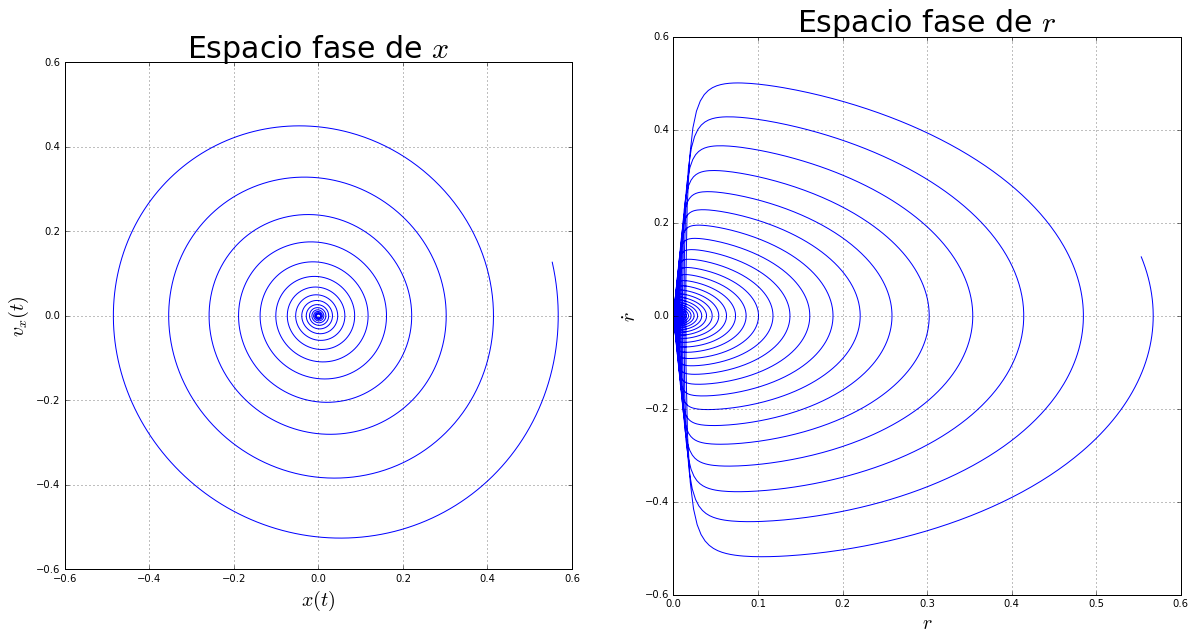

In [221]:
fig, ax = plt.subplots(figsize=(20,10))

ini = [rand(), rand(),rand(), rand()]


t_c, sol_c = rk4(resorte_cartesianas, ini, [0,t_f])
t_p, sol_p = rk4(resorte_polares,ini, [0,t_f])

subplot(1,2,1,aspect='equal')
title(r"Espacio fase de $x$",fontsize = 30), xlabel(r'$x(t)$', fontsize = 20),ylabel(r'$v_x(t)$', fontsize = 20)
grid(True),
plot(sol_c[:,0], sol_c[:,2])

subplot(122)
title(r"Espacio fase de $r$",fontsize = 30), xlabel(r'$r$', fontsize = 20),ylabel(r'$\dot r$', fontsize = 20)
grid(True), 
plot(sol_p[:,0], sol_p[:,2])
    
show()

# Ejercicio 2

Ahora se considerará el mismo sistema pero ahora con una carga positiva como partícula y en el origen abrá también una carga del mismo signo, tal que $q_1=q_2=\sqrt{4\pi\varepsilon_0}$. Entonces la ecuación diferencial es

\begin{align}
\mbox{Si } u_2^2+ u_1^2 v_2^2 < 1& & \mbox{Si } u_2^2+ u_1^2 v_2^2  > 1 \\  \\
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ ( v_2^2-\frac{k}{m}) u_1 -\frac{\gamma}{m} u_2 + \frac{1}{u_1^2}\\ -(2\frac{ u_2}{u_1}+\frac{\gamma}{m}) v_2 
\end{array}\right) 
&  &
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\ ( v_2^2-\frac{k}{m}) u_1 -\frac{\mu}{m}((u_2^2+ u_1^2 v_2^2)^{1/4}) u_2 +\frac{1}{u_1^2}\\ -(2\frac{ u_2}{u_1}+\frac{\mu}{m}(u_2^2+ u_1^2 v_2^2)^{1/4}) v_2 
\end{array}\right) 
\end{align}

 Donde $u_1 = r,\,v_1=\theta,\,u_2 = \dot r\mbox{ y }v_2 = \dot \theta$

In [91]:
def resorte_carga(r, t, args = [1.,1.,1.,0.1,0.2]):  # #r = [r, theta, dot r, dot theta], args = [m,q,k,,gamma,mu]; gamma=mu=0 es no friccion 
    u1, v1, u2, v2 = r[0], r[1], r[2], r[3]  
    m, q, k, gamma, mu = args[0], args[1], args[2], args[3], args[4]
    
    norm_vel = sqrt(u2**2 +(u1*v2)**2) 
    du1, dv1 = u2, v2
        
    if u1 != 0 and norm_vel <= 1:
        du2 = (v2*v2-(k/m))*u1 - (gamma/m)*u2 + (1/(u1**2))
        dv2 = -(2*(u2/u1)+(gamma/m))*v2
    elif u1 != 0 and norm_vel > 1:
        du2 = (v2**2-(k/m))*u1 -(mu/m)*sqrt(norm_vel)*u2 + (1/(u1**2))
        dv2 = -(2*(u2/u1)+(gamma/m)*sqrt(norm_vel))*v2
    elif u1 == 0 and norm_vel <= 1:
        du2 = (v2*v2-(k/m))*u1 - (gamma/m)*u2 + (1/(u1**2))
        dv2 = 0
    else:
        du2 = (v2**2-(k/m))*u1 -(mu/m)*sqrt(norm_vel)*u2 + (1/(u1**2))
        dv2 = 0        
        
    return array([du1, dv1, du2, dv2])

### Caso sin fricción

Cuando no hya fricción lar órbitas resultantes son simepre cerradas ( a excepción del caso patológico en el que se evalúa en $r=0$). Esto es debido a que la partícula se somete a dos fuerzas que son conservativa, cuyos potenciales permiten orbitas cerradas. Observemos esto mediangte una simulación con condiciones arbitrarias en el as velocidades iniciales.

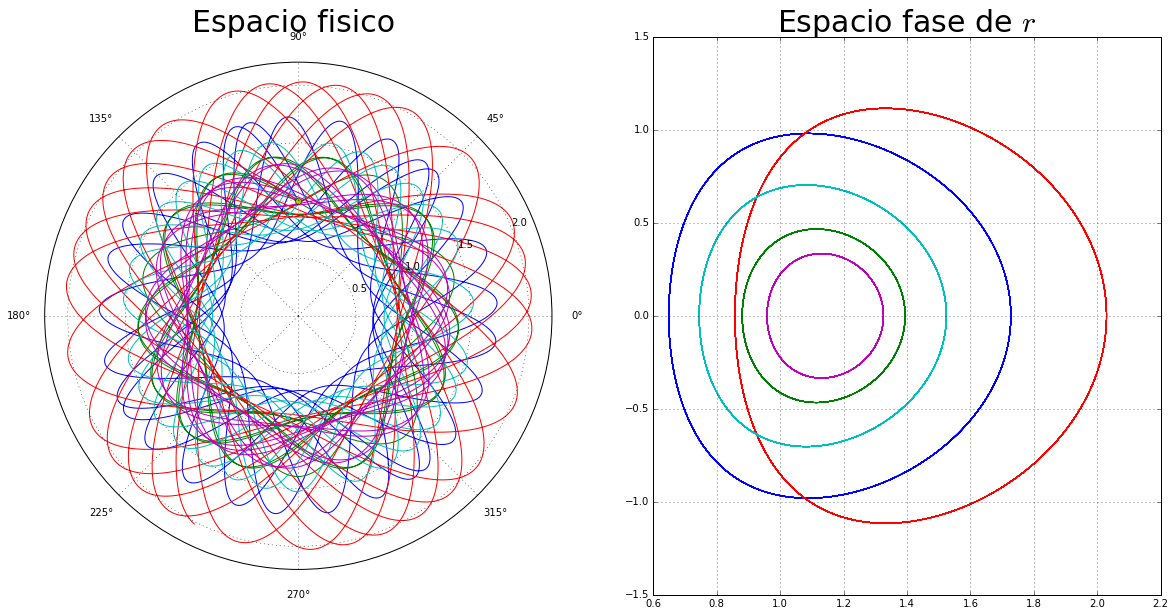

In [222]:
t_f = 100

fig = figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122)
grid(True)
ax.set_title(r"Espacio fisico ", fontsize=30)
bx.set_title(r"Espacio fase de $r$", fontsize=30)

for i in range(5):
    cond_ini = array([1., pi/2., rand(), 0.5+rand()])
    t_p, sol_p = rk4(resorte_carga, cond_ini, [0,t_f],[1.,1.,1.,0,0])
    ax.plot(sol_p[:,1], sol_p[:,0], linewidth=1)
    bx.plot(sol_p[:,0], sol_p[:,2], linewidth=1)
ax.plot(pi/2,1,'o')
show()

En la precencia de fricción también hay orbitas cerradas. per sólo cuando la magnitud de la velocidad inicial lo permite. Esto se debe a que se llega a un equilibrio en la comoponente radial de las fuerzas, lo cual fija ina distancia medida desde el centro. Debido a la fricción, la carga dejará de avanzar en su componente angular eventualmente pero si la vel inicial es los fuficientemente alta, puede acompletarse una revolución en la órbita de equilibrio. Obsrvemos esto con una simualción con una magnitud de velocidad menor o igual a la unidad y luego con valores entre cero y cinco.

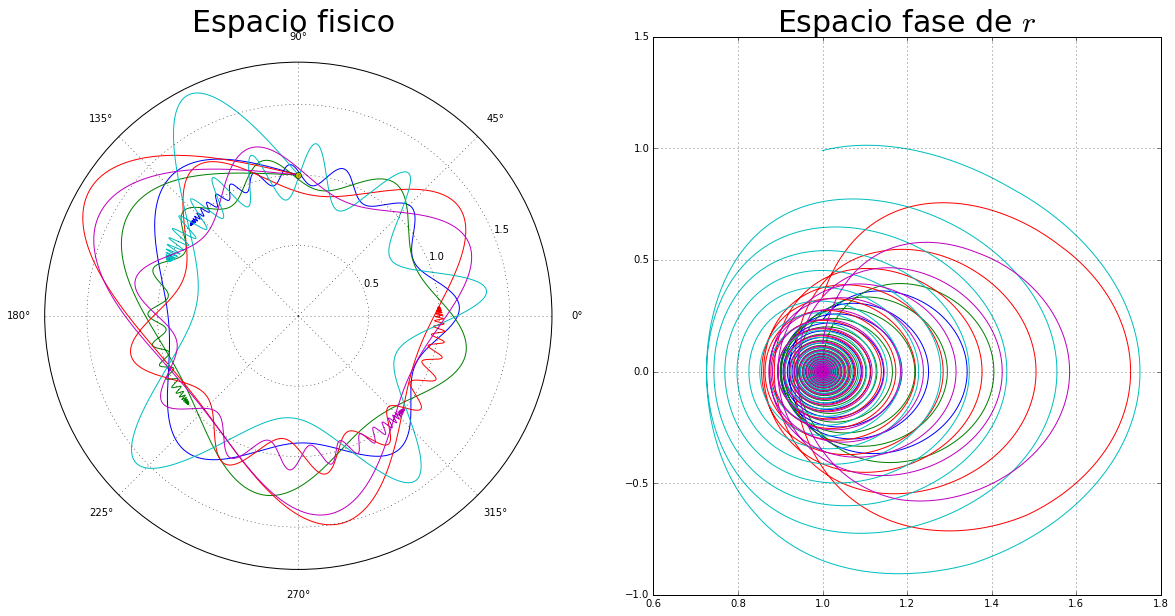

In [223]:
t_f = 100

fig = figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122 )
grid(True)
ax.set_title(r"Espacio fisico ", fontsize=30)
bx.set_title(r"Espacio fase de $r$", fontsize=30)

for i in range(5):
    cond_ini = array([1., pi/2., rand(), 0.5+rand()])
    t_p, sol_p = rk4(resorte_carga, cond_ini, [0,t_f],[1.,1.,1.,.1,.2])
    ax.plot(sol_p[:,1], sol_p[:,0], linewidth=1)
    bx.plot(sol_p[:,0], sol_p[:,2], linewidth=1)
ax.plot(pi/2,1,'o')
show()

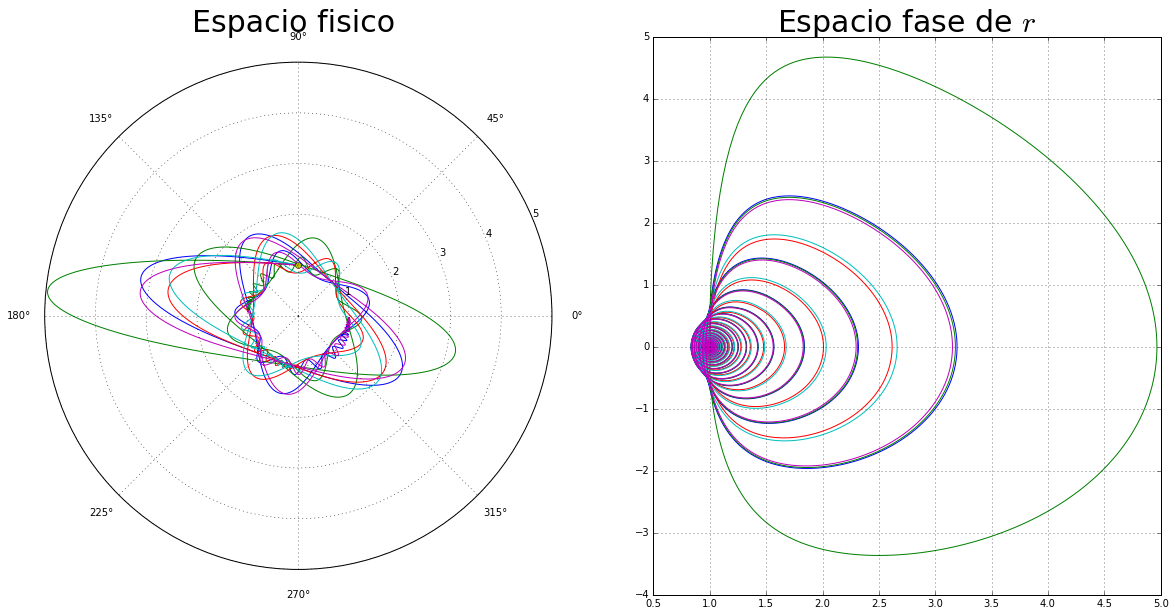

In [225]:
t_f =500

fig = figure(figsize=(20,10))
ax = fig.add_subplot(121, projection='polar')
bx = fig.add_subplot(122)
grid(True)
ax.set_title(r"Espacio fisico ", fontsize=30)
bx.set_title(r"Espacio fase de $r$", fontsize=30)

for i in range(5):
    cond_ini = array([1., pi/2., rand(),5*( 0.5+rand())])
    t_p, sol_p = rk4(resorte_carga, cond_ini, [0,t_f],[1.,1.,1.,.1,.2])
    ax.plot(sol_p[:,1], sol_p[:,0], linewidth=1)
    bx.plot(sol_p[:,0], sol_p[:,2], linewidth=1)
ax.plot(pi/2,1,'o')
show()

En el espacio fase de $r$ para los casoso de fricción puede observarse cómo hay un punto de convergencia al rededor de $r=1$. Es ahí donde puede cerrarse la órbita con fricción.

# Ejercicio 3

Esta vez, tenemos una particula en una caja que rebotará cada vez que choque con la misma. Le ecuación de movimiento es la siguiente, asumiendo que hay un modelo de fricción:
$$
\left(\begin{array}{c}\dot u_1 \\ \dot v_1 \\ \dot u_2\\ \dot v_2\end{array}\right) = \left(\begin{array}{c} u_2 \\ v_2 \\ \frac{1}{m} fric(u_1)\\-g +\frac{1}{m} fric(v_1)\end{array}\right)
$$
Con $u_1 = x,\, u_2 = \dot x, \, v_1 = y\mbox{ y } v_2 = \dot y$

In [153]:
def e_mov(r_v,t,fric=0, g=9.8,m=1):
    dx = r_v[2]
    dy = r_v[3]
    if fric == 0:
        dvx,dvy = 0,-g
    else:
        dvx = - fric([r_v[2],r_v[3]])[0]/m
        dvy = -g- fric([r_v[2],r_v[3]])[1]/m
    return array([dx,dy,dvx,dvy])

Como modelo de fricción opcional se utilizará uno proporcional a la velocidad

In [154]:
def fric_v(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y]) 

La caja en donde estará la caja esta compusta de dos planos inclinados con el mismo ángulo de inclinación que se unen en un punto, una longitud total de $5m$ de largo y cuando acaban los planos inlclinados, se eleva hasta $3m$ más sobre ellos. Los angulos de inclinación serán de $\pi/6$ y $\pi/10$ o lo que es lo mismo, $30^\circ$ y $18^\circ$

In [155]:
def plano(x,angulo):
    return -tan(angulo*pi/180.)*x

def techo(x,angulo):
    y = zeros(len(x))
    a = 5*tan(angulo*pi/180.)
    y[:] = a + 3
    return y

def pared(pt, angulo):
    a = 5*tan(angulo*pi/180.)
    y = arange(a,a+3,.01)
    x = zeros(len(y))
    x[:] = pt
    return array([x,y])

def caja(x,angulo):
    ang = angulo
    pt_i = x[0]
    pt_f = x[-1]
    
    p = -plano(abs(x), ang)
    t = techo(x, ang)
    der = pared(pt_i,ang)
    izq = pared(pt_f,ang)
    
    return plot(x,p[:], x,t[:], der[0,:],der[1,:], izq[0,:],izq[1,:], color = 'black',linewidth=5)

Notemos que se utilizó la función plano, la cual se definió en la Tarea 2. Esta función es un plano inclinado dado un ángulo de inclinación. Utilizando estas funciones se puede visualizar la caja de la siguiente manera.

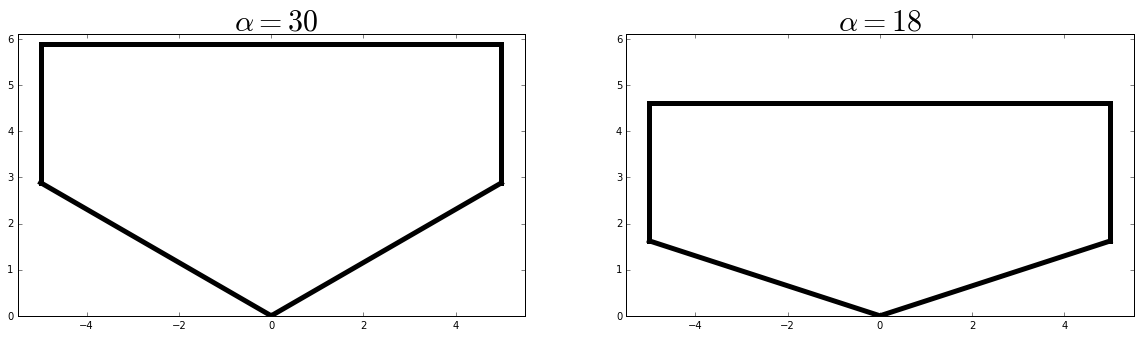

In [156]:
fig, ax = plt.subplots(figsize=(20, 10))

angulos = array([30, 18]) #pi/6, pi/10
equis = arange(-5,5,.01)

subplot(1,2,1, aspect = 'equal')
title(r' $\alpha = %s$' %(str(angulos[0])),fontsize = 30), xlim([-5.5,5.5]), ylim([0,6.1])
caja(equis, angulos[0])

subplot(1,2,2, aspect = 'equal')
title(r'$\alpha = %s$' %(str(angulos[1])),fontsize = 30), xlim([-5.5,5.5]), ylim([0,6.1])
caja(equis, angulos[1])
show()

Para los rebotes, hay que definir los casos para cada una de las cinco fronteras. Siempre son reflexiones en las componentes de la velocidad perpendiculares a la superficies por lo que podemos utilizar la siguiente tranformación lineal para el caso en el que rebote en los planos inclinados. 
$$
\left(\begin{array}{c}x'\\y'\\\dot x'\\\dot y' \end{array}\right) = \left(\begin{array}{c c c c}1 & 0 & 0 & 0\\0& 1& 0 &0 \\0&0& \cos\theta & -\sin\theta\\0&0&\sin\theta & \cos\theta \end{array}\right) \left(\begin{array}{c}x\\y\\\dot x \\ \dot y \end{array}\right) 
$$
Se utilizarará $\theta = \alpha$ si cae en el lado izquierdo o $\theta = -\alpha$. Para el caso del techo o de las paredes no es necesario hacer rotaciones en las velocidades para saber qué componentes son reflejadas.

In [157]:
def rot_vel(ang):
    ang = ang*pi/180.
    return array([1,0,0,0]),array([0,1,0,0]),array([0,0,cos(ang),-sin(ang)]),array([0,0,sin(ang),cos(ang)])

Para el rebote con los planos se utilizará la función de la Tarea dos, la cual al encontrar las raices con  los planos rota las velocidades para conocer las componentes reflejadas (las perpendiculares a las superficies).

In [158]:
def rebote(r_v_i,mi_dt,ang,modelo_fric=0):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]

    while abs(y_izq[1]-plano(y_izq[0],ang))>1e-5:
        if (y_izq[1]-plano(y_izq[0],ang))*(y_med[1]-plano(y_med[0],ang))<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = dot(rot_vel(ang),y_izq)
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

La altura del techo depende del ángulo de inclinación de los planos. Se fija el valor que tiene el techo para cáda ángulo es utilizado el mismo algoritmo que en la función de arriba. En este caso lo único que se refleja es la componente $y$ por lo que no es necesario hacer ninguna rotación.

In [159]:
def rebote_techo(r_v_i,mi_dt,ang,modelo_fric=0):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]
    tope_y = 3 + 5*tan(angulo*pi/180.)

    while abs(y_izq[1]-tope_y)>1e-5:
        if (y_izq[1]-tope_y)*(y_med[1]-tope_y)<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
    y_izq = dot(rot_vel(ang),y_izq)
    y_izq = array([y_izq[0],y_izq[1],y_izq[2],-y_izq[3]])
    return y_izq

El último rebote a definir es el de las paredes. Como este valor esta fijo y se encuntre en $\pm 5$, sólo es necesario saber en qué región se está. Se toma el signo del último valor de 5 y así sabermos qué punto es el que no debe pasar. En este caso la componente en $x$ es la reflejada.

In [160]:
def rebote_pared(r_v_i,mi_dt,modelo_fric=0):
    dt_busqueda = mi_dt/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda],modelo_fric)
    y_med = sol[-1,:]
    pared = sign(y_izq[0])*5

    while abs(y_izq[0]-pared)>1e-5:
        if (y_izq[0]-pared)*(y_med[0]-pared)<0:
            reinicio = y_izq
        else:
            reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t, sol = rk4(e_mov, reinicio,[0,dt_busqueda],modelo_fric)
        y_izq = reinicio
        y_med = sol[-1,:]
        pared = sign(y_izq[0])*5
    y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])
    return y_izq

Lo único que resta es saber cuándo cada condición es aplicada. 
Si $x<0$ y cruza el plano inclinado se entra a la función rebote con un ángulo de incinación de $\alpha$. Si $x>0$ y curza el plano, entonces el ángulo a considerar es $-\alpha$. Si $5 < |x|$ entonces entra rebote_pared. Si la altura es mayor que el techo entra en rebote_techo.

In [161]:
def datos_graf(cond_ini, ang, modelo_fric=0,pts=100, dt=0.1):
    N = pts
    inicio = cond_ini
    trayectoria = zeros((N,len(inicio)))
    mi_dt = dt
    trayectoria[0,:] = array(inicio)
    tope_y = 3 + 5*tan(angulo*pi/180.)
    
    for i in range(N-1):
        t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt], modelo_fric)
    
        if sol_dt[-1,:][0]<=0 and sol_dt[-1,:][1]-plano(sol_dt[-1,:][0], ang) < 0:
            y_izq = rebote(trayectoria[i,:],mi_dt,ang)    
            trayectoria[i+1,:] = y_izq
        elif sol_dt[-1,:][0] > 0 and sol_dt[-1,:][1]-plano(sol_dt[-1,:][0], -ang) < 0:
            y_izq = rebote(trayectoria[i,:],mi_dt,-ang)    
            trayectoria[i+1,:] = y_izq
        elif sol_dt[-1,:][1] >= tope_y:
            y_izq = rebote_techo(trayectoria[i,:],mi_dt,0)    
            trayectoria[i+1,:] = y_izq
        elif 5 <= abs(sol_dt[-1,:][0]):
            y_izq = rebote_pared(trayectoria[i,:],mi_dt,0)    
            trayectoria[i+1,:] = y_izq
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]
    return trayectoria

A partir de este punto, en este ejercicio tomatres la convención de que las gráficas en color verde hacen referencia a los modelos sin fricción y los azules a cuando sí la hay. 

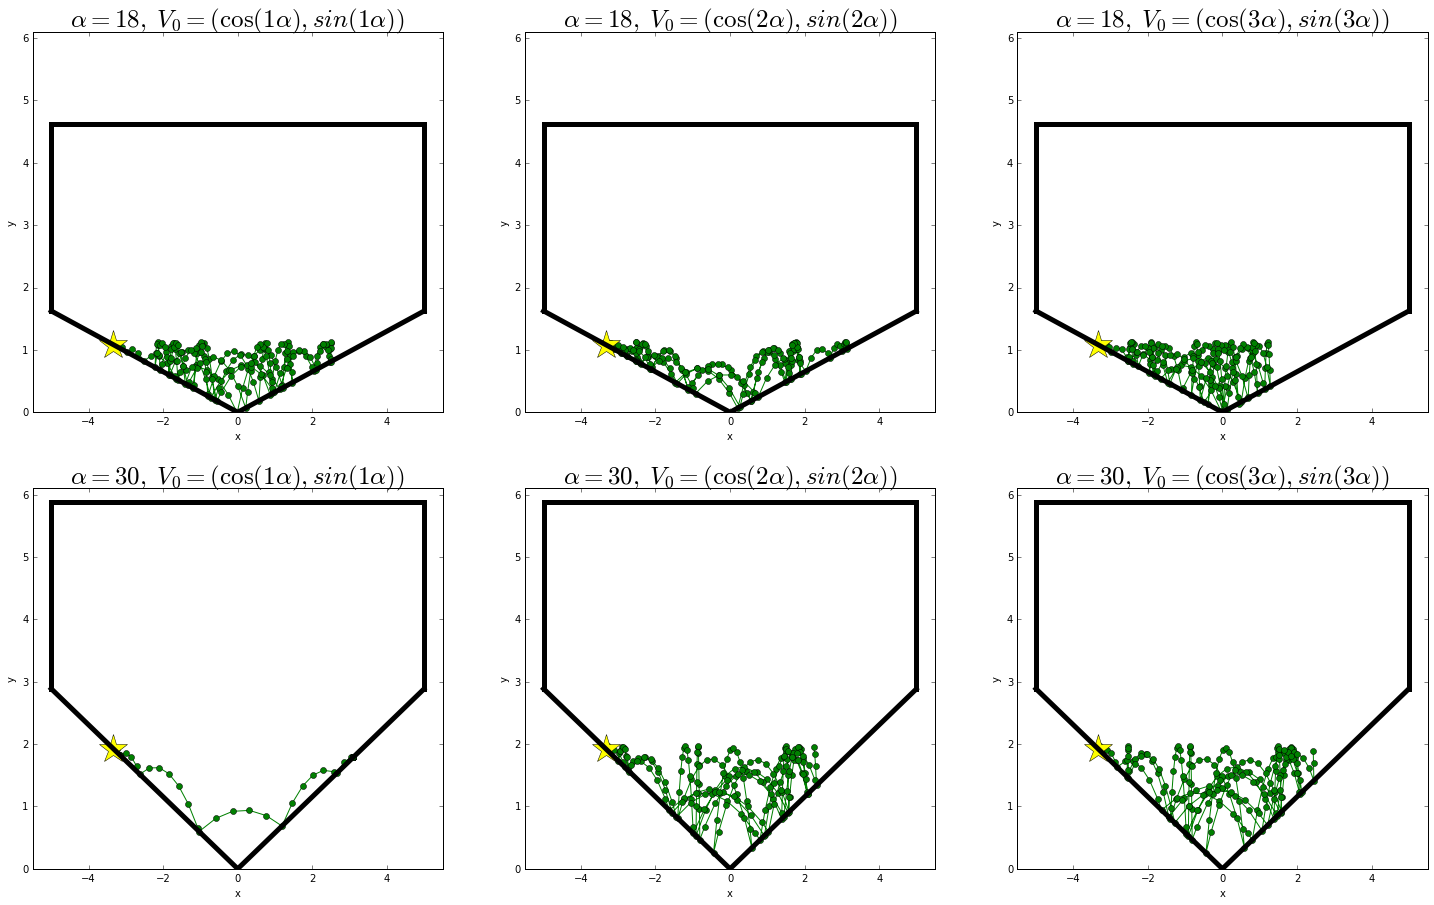

In [180]:
angulos = [18,30]
multi = [1,2,3]

fig, ax = plt.subplots(figsize=(25,15 ))

n = 1
for i in xrange(len(angulos)):
    angulo = angulos[i]

    for j in multi:
        inicio = [-10./3,10.*tan(angulo*pi/180)/3, cos(j*angulo*pi/180), sin(j*angulo*pi/180)]
        trayectoria = datos_graf(inicio,angulo,0,200)
        
        subplot(2,3, n), xlim([-5.5,5.5]), ylim([0,6.1])
        title(r'$\alpha = %s\; V_0= (\cos(%s \alpha),sin(%s \alpha))$' %(str(angulos[i])+',',str(j),str(j)),fontsize = 25),xlabel('x'),ylabel('y')
        plot(trayectoria[:,0],trayectoria[:,1],'o-',color = 'green')
        plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
        caja(equis, angulo)
        n +=1
show()

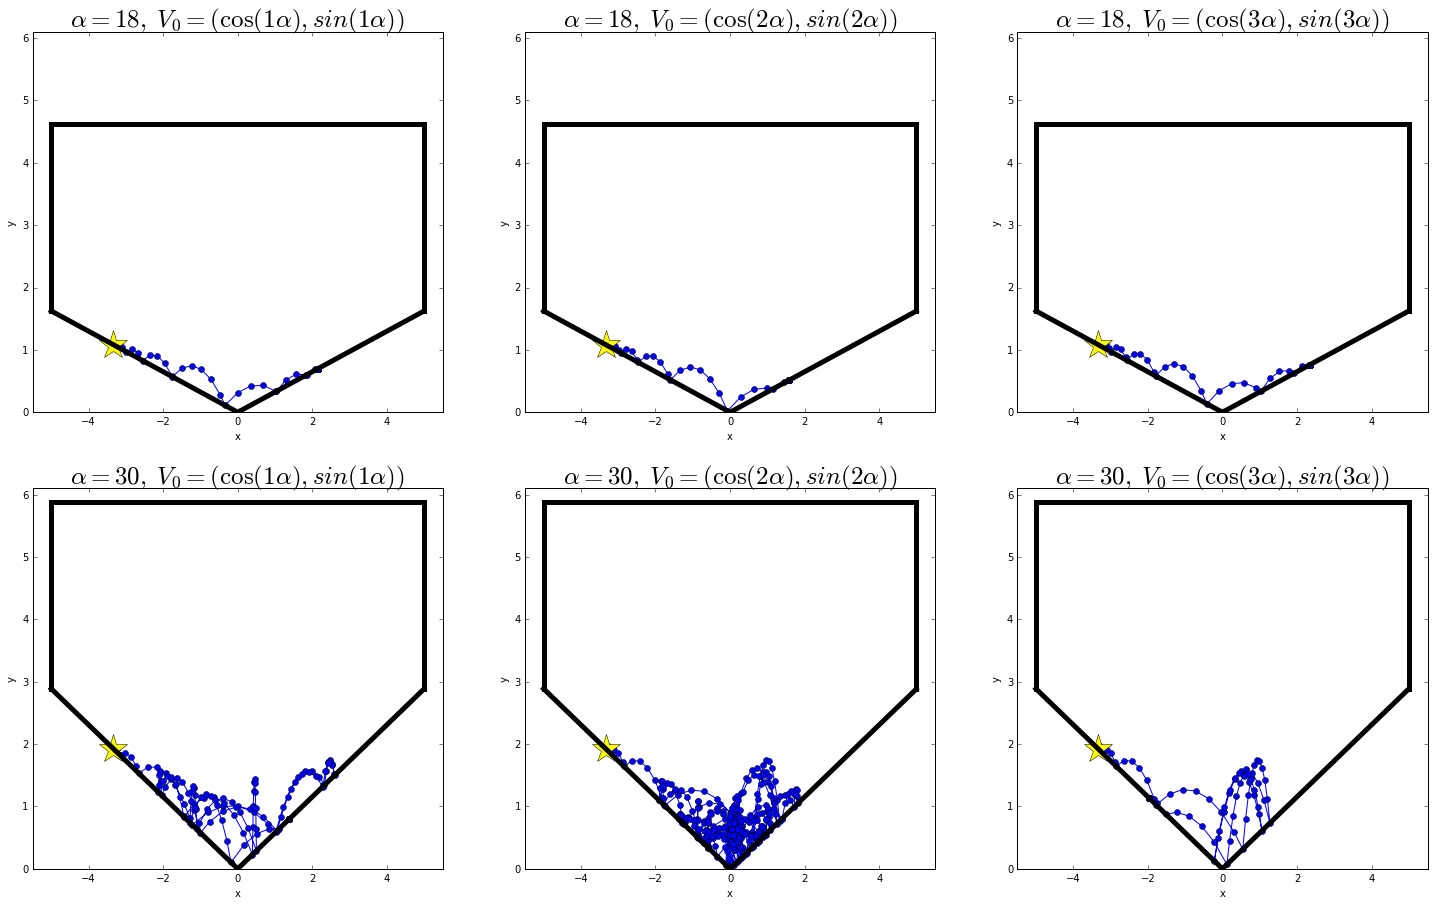

In [179]:
angulos = [18,30]
multi = [1,2,3]

fig, ax = plt.subplots(figsize=(25,15 ))

n = 1
for i in xrange(len(angulos)):
    angulo = angulos[i]

    for j in multi:
        inicio = [-10./3,10.*tan(angulo*pi/180)/3, cos(j*angulo*pi/180), sin(j*angulo*pi/180)]
        trayectoria = datos_graf(inicio,angulo,fric_v,300)
        
        subplot(2,3, n),  xlim([-5.5,5.5]), ylim([0,6.1])
        title(r'$\alpha = %s\; V_0= (\cos(%s \alpha),sin(%s \alpha))$' %(str(angulos[i])+',',str(j),str(j)),fontsize = 25),xlabel('x'),ylabel('y')
        plot(trayectoria[:,0],trayectoria[:,1],'o-')
        plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
        caja(equis, angulo)
        n +=1
show()

 Lo primero a destacar es que algunas de las trayectorias actúan como si fuesen estacionarias: recorren una única trayectoria de ida y vuelta. Esto ocurre sólo una vez y es en el caso ideal. Para los casos de fricción lo que ocurre es que llega un punto en el que deja de rebotar la pelora. Esto sucedió para $\alpha = 18$.

Ahora vamos a utilizar las mismas condiciones pero la magnitud de &V_0& será igual a $25$ y no de uno.

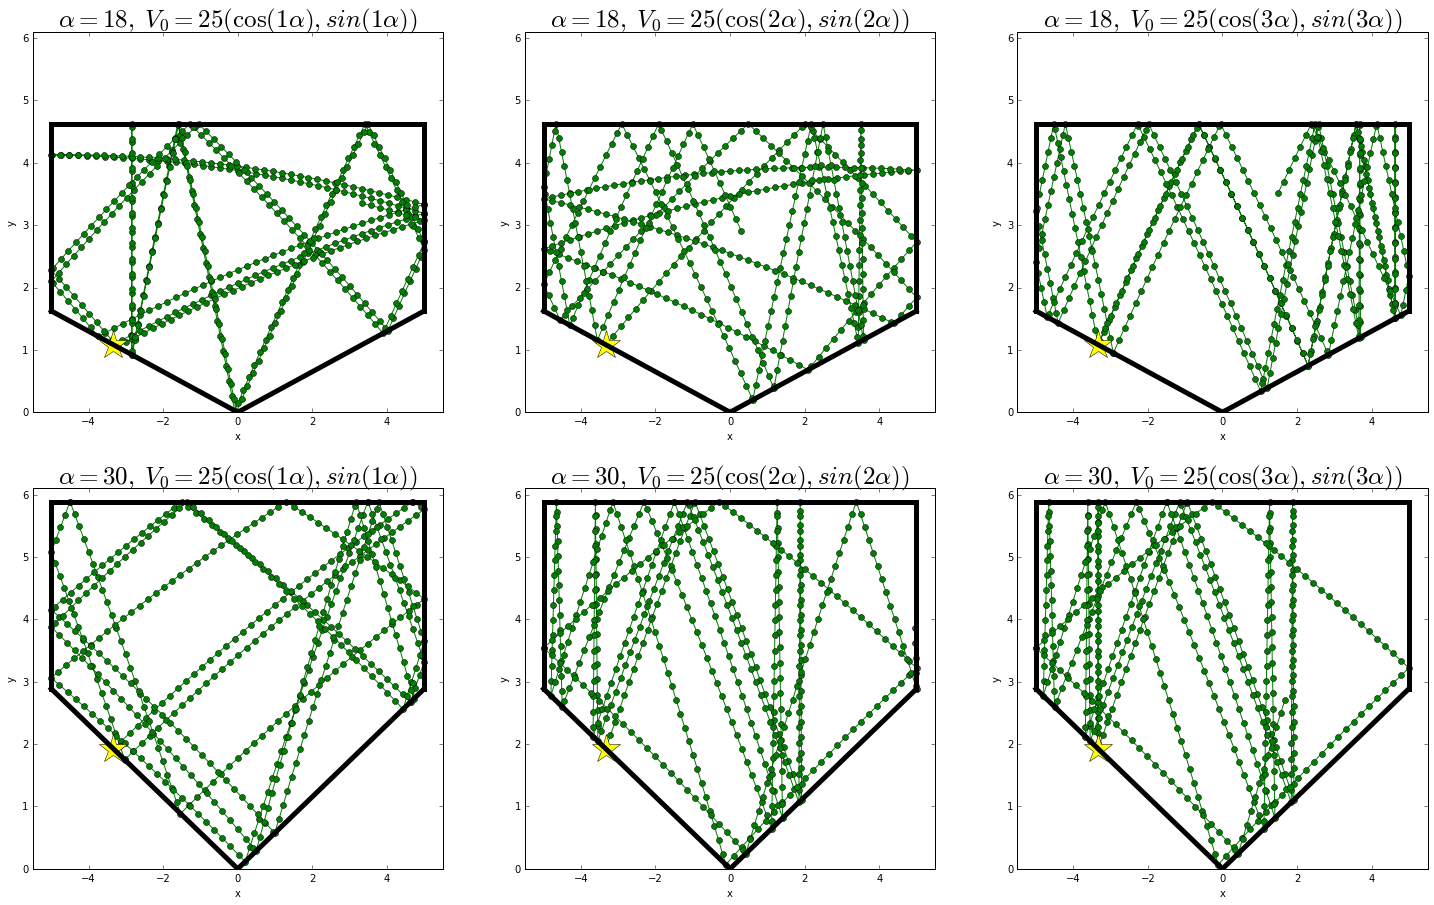

In [181]:
angulos = [18,30]
multi = [1,2,3]

fig, ax = plt.subplots(figsize=(25,15 ))

n = 1
for i in xrange(len(angulos)):
    angulo = angulos[i]

    for j in multi:
        inicio = [-10./3,10.*tan(angulo*pi/180)/3, 25*cos(j*angulo*pi/180), 25*sin(j*angulo*pi/180)]
        trayectoria = datos_graf(inicio,angulo,0,500,.01)
        
        subplot(2,3, n),  xlim([-5.5,5.5]), ylim([0,6.1])
        title(r'$\alpha = %s\; V_0=25 (\cos(%s \alpha),sin(%s \alpha))$' %(str(angulos[i])+',',str(j),str(j)),fontsize = 25),xlabel('x'),ylabel('y')
        plot(trayectoria[:,0],trayectoria[:,1],'o-',color = 'green')
        plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
        caja(equis, angulo)
        n +=1
show()

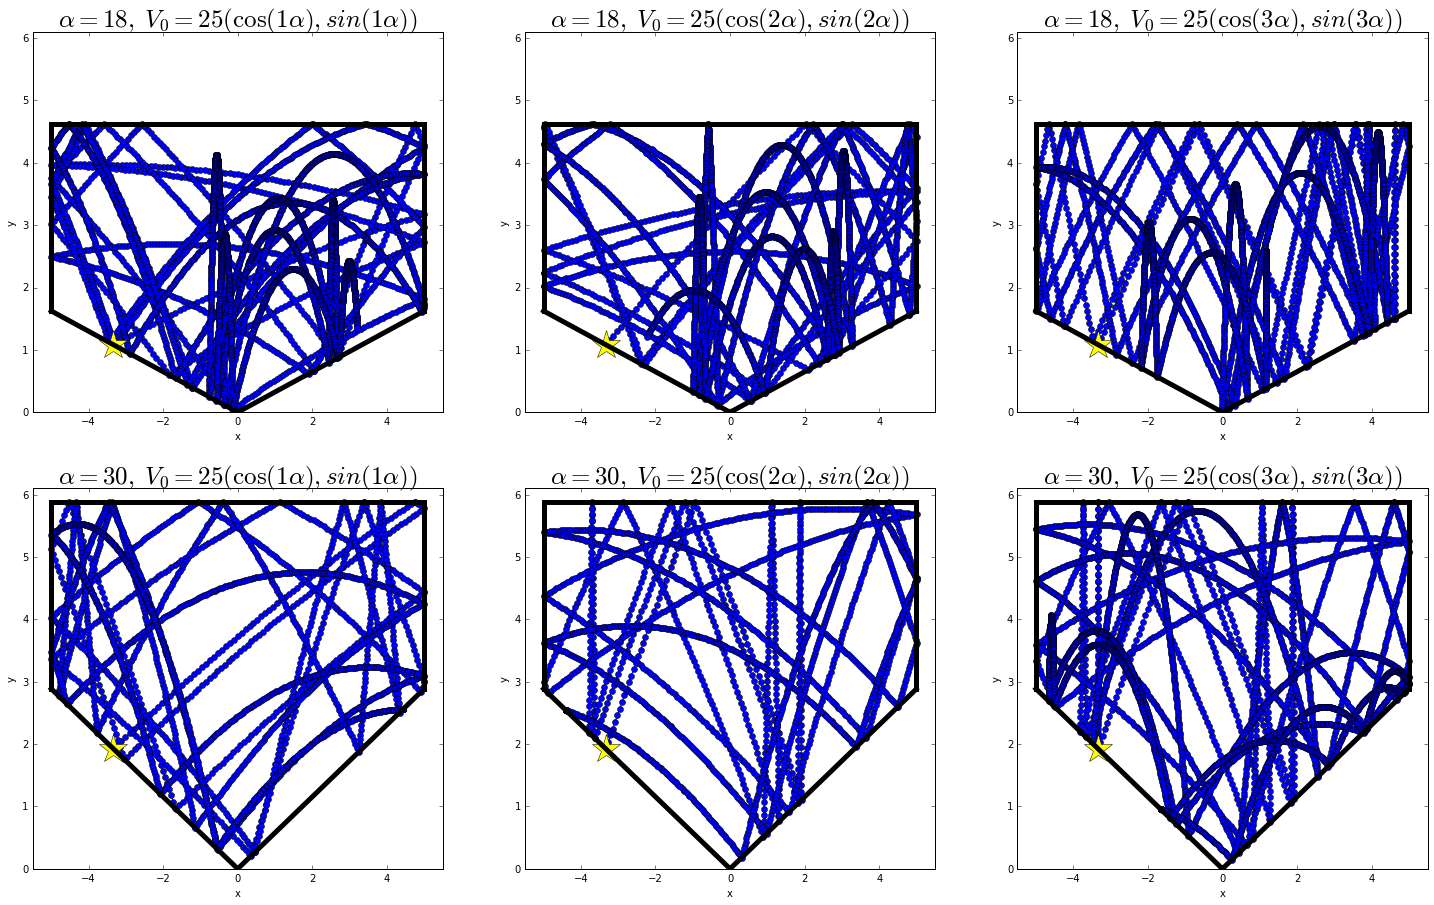

In [183]:
fig, ax = plt.subplots(figsize=(25,15 ))

n = 1
for i in xrange(len(angulos)):
    angulo = angulos[i]

    for j in multi:
        inicio = [-10./3,10.*tan(angulo*pi/180)/3, 25*cos(j*angulo*pi/180), 25*sin(j*angulo*pi/180)]
        trayectoria = datos_graf(inicio,angulo,fric_v,5000,.01/2)
        
        subplot(2,3, n),  xlim([-5.5,5.5]), ylim([0,6.1])
        title(r'$\alpha = %s\; V_0=25 (\cos(%s \alpha),sin(%s \alpha))$' %(str(angulos[i])+',',str(j),str(j)),fontsize = 25),xlabel('x'),ylabel('y')
        plot(trayectoria[:,0],trayectoria[:,1],'o-')
        plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
        caja(equis, angulo)
        n +=1
show()

Ahora la magnitud de $V_0$ será de $60$

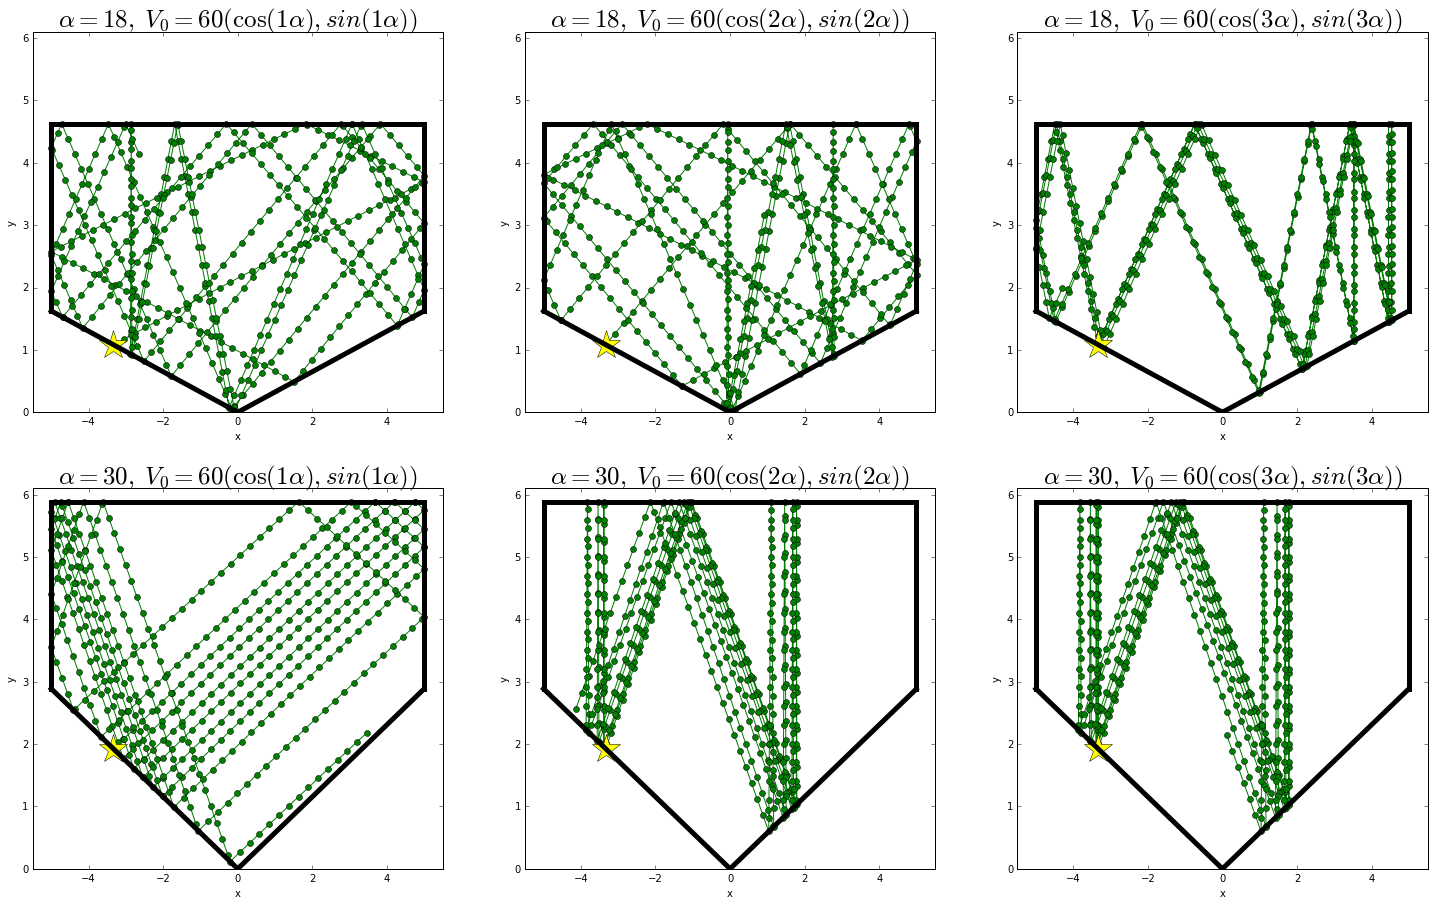

In [184]:
angulos = [18,30]
multi = [1,2,3]

fig, ax = plt.subplots(figsize=(25,15 ))

n = 1
for i in xrange(len(angulos)):
    angulo = angulos[i]

    for j in multi:
        inicio = [-10./3,10.*tan(angulo*pi/180)/3, 60*cos(j*angulo*pi/180), 60*sin(j*angulo*pi/180)]
        trayectoria = datos_graf(inicio,angulo,0,500,.1/20)
        
        subplot(2,3, n),  xlim([-5.5,5.5]), ylim([0,6.1])
        title(r'$\alpha = %s\; V_0=60 (\cos(%s \alpha),sin(%s \alpha))$' %(str(angulos[i])+',',str(j),str(j)),fontsize = 25),xlabel('x'),ylabel('y')
        plot(trayectoria[:,0],trayectoria[:,1],'o-',color = 'green')
        plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
        caja(equis, angulo)
        n +=1
show()

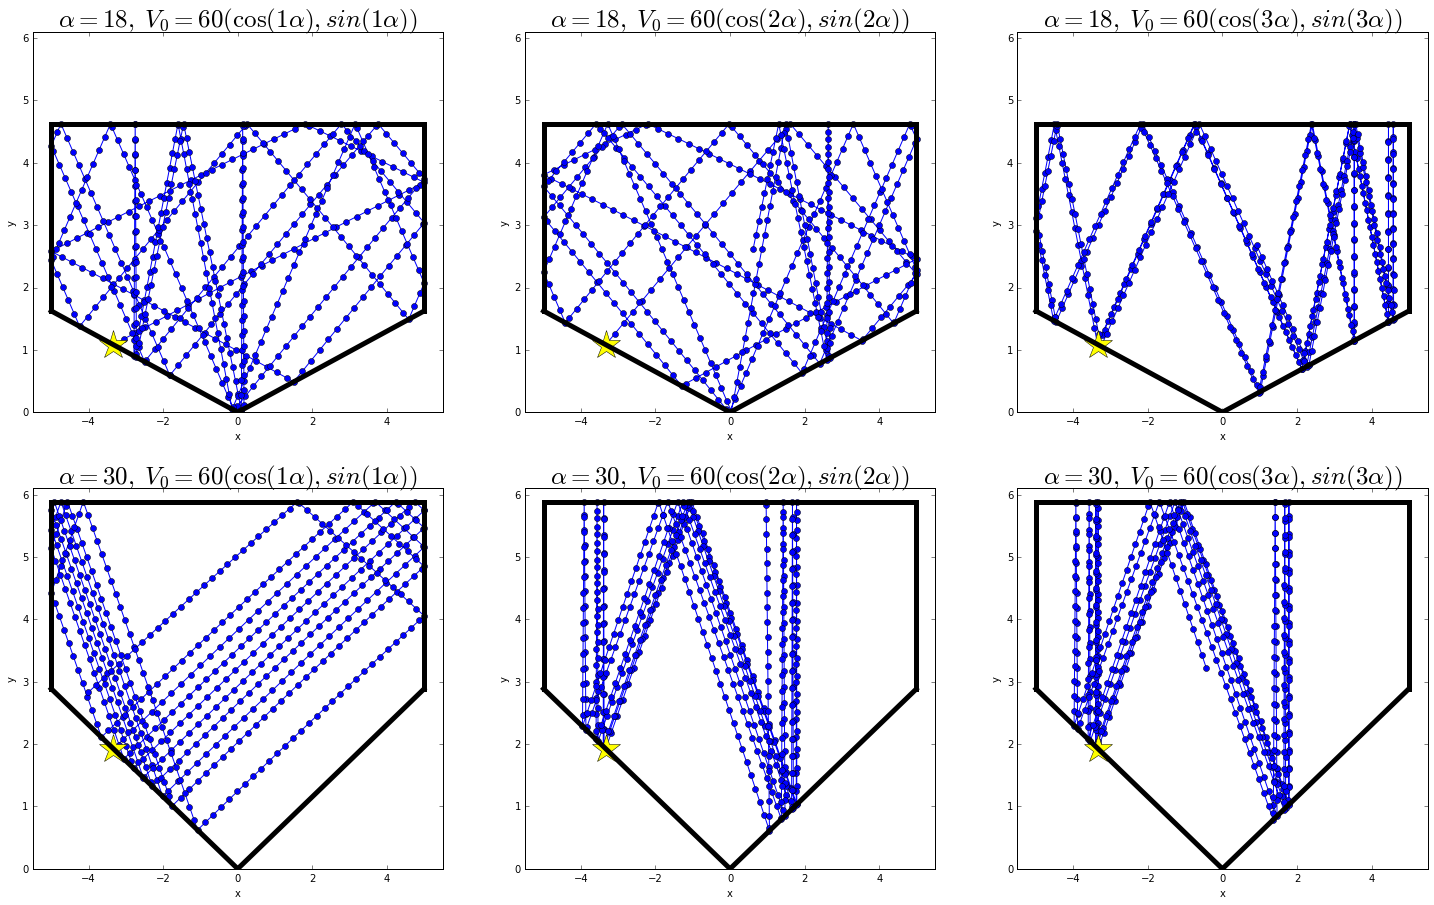

In [185]:
fig, ax = plt.subplots(figsize=(25,15 ))

n = 1
for i in xrange(len(angulos)):
    angulo = angulos[i]

    for j in multi:
        inicio = [-10./3,10.*tan(angulo*pi/180)/3, 60*cos(j*angulo*pi/180), 60*sin(j*angulo*pi/180)]
        trayectoria = datos_graf(inicio,angulo,fric_v,500,.1/20)
        
        subplot(2,3, n),  xlim([-5.5,5.5]), ylim([0,6.1])
        title(r'$\alpha = %s\; V_0=60 (\cos(%s \alpha),\sin(%s \alpha))$' %(str(angulos[i])+',',str(j),str(j)),fontsize = 25),xlabel('x'),ylabel('y')
        plot(trayectoria[:,0],trayectoria[:,1],'o-')
        plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
        caja(equis, angulo)
        n +=1
show()

Para estas se debe mencionar que hibo problemas en los cálculos varias veces y de distitos tipos. Dejando un paso de $h =0.1$, para estas velocidades, había casos en los que dos condiciones de rebote se cumplían pero era calculada la que aparece primero en el código, la cual no siempre fue la correcta. Se intentó solucionar esto reduciendo el tamaño de pasos pero no siempre fue posible puesto que en algún momento se hacía una división entre cero. Esto se pensó era causa de que el intervalo a analizar era menor que el paso pero se modificó el método de rk4 para que redujera el tamaño del paso cuando esto ocurriera hasta que al menos puedieran analizarse cinco puntos.

Las trayectorias dibudajas para las vel de magnitud $25$ difieren para el caso ideal y el caso con fricción y son distingubles sin necesidad de un análisis mayor pero para la vel. de magnitug $60$ este no es el caso. LAs gráficas parecen ser identica aunque el efecto de la fricción es notorio si se comparan las gráficas de $\alpha =30$ y $V_0 = 60(\cos(3\alpha), \sin(3\alpha))$. Al final, la trayectoria sin fricción logró dar un rebote más que la trayectoria sin fricción. Esta aclaración es válida únicamente porque el tamaño del paso es el mismo entonces puede hacerse la comparación.

Ahora vamos a considerar el caso en el que la velocidad tiene norma de 25 y es lanzado de forma vertical y otro en el que se lanza con un ángulo igual a la pendiente del plano. Además se verán los espacios faces de las soluciones.

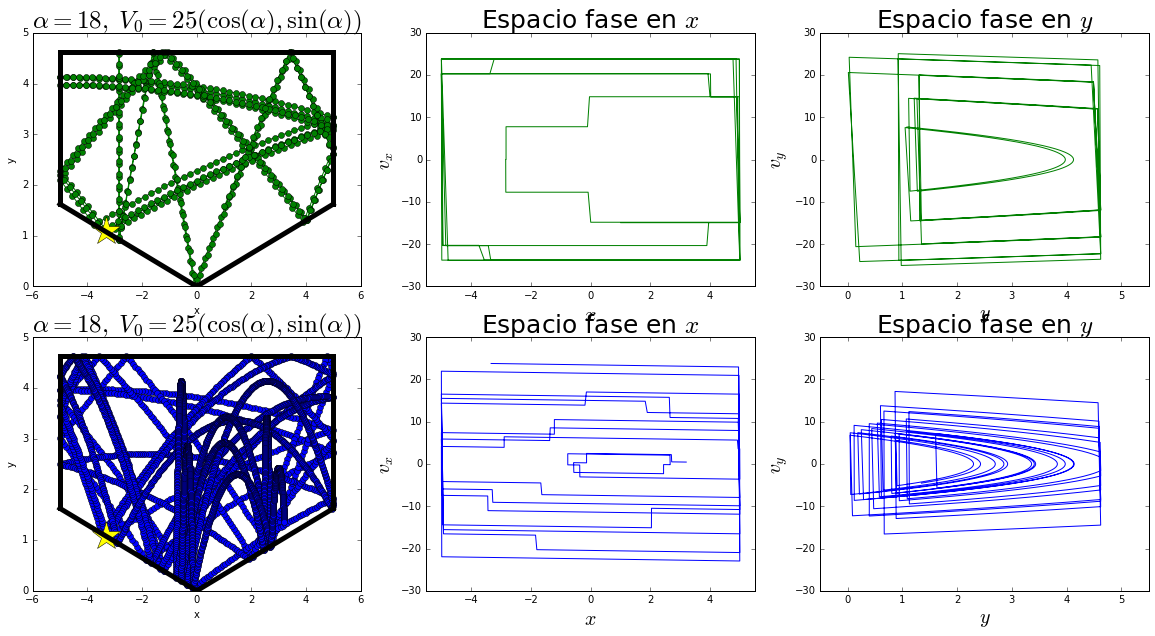

In [206]:
fig, ax = plt.subplots(figsize=(20,10))

angulo = 18
inicio = [-10./3,10.*tan(angulo*pi/180)/3, 25*cos(angulo*pi/180), 25*sin(angulo*pi/180)]
trayectoria = datos_graf(inicio,angulo,0,700,.01)


subplot(2,3, 1)
title(r'$\alpha = %s\; V_0=25 (\cos( \alpha),\sin(\alpha))$' %(str(angulo)+','),fontsize = 25)
xlabel('x'),ylabel('y')
plot(trayectoria[:,0],trayectoria[:,1],'o-',color = 'green')
plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
caja(equis, angulo)

subplot(2,3, 2), xlim([-5.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $x$ ',fontsize = 25)
xlabel(r'$x$',fontsize = 20),ylabel(r'$v_x$',fontsize = 20)
plot(trayectoria[:,0],trayectoria[:,2],'-',color = 'green')

subplot(2,3, 3), xlim([-.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $y$ ',fontsize = 25)
xlabel(r'$y$',fontsize = 20),ylabel(r'$v_y$',fontsize = 20)
plot(trayectoria[:,1],trayectoria[:,3],'-',color = 'green')




trayectoria = datos_graf(inicio,angulo,fric_v,5000,.01/2)

subplot(2,3, 4) 
title(r'$\alpha = %s\; V_0=25 (\cos( \alpha),\sin(\alpha))$' %(str(angulo)+','),fontsize = 25)
xlabel('x'),ylabel('y')
plot(trayectoria[:,0],trayectoria[:,1],'o-')
plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
caja(equis, angulo)

subplot(2,3, 5),xlim([-5.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $x$ ',fontsize = 25)
xlabel(r'$x$',fontsize = 20),ylabel(r'$v_x$',fontsize = 20)
plot(trayectoria[:,0],trayectoria[:,2],'-')

subplot(2,3, 6),xlim([-.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $y$ ',fontsize = 25)
xlabel(r'$y$',fontsize = 20),ylabel(r'$v_y$',fontsize = 20)
plot(trayectoria[:,1],trayectoria[:,3],'-')

show()

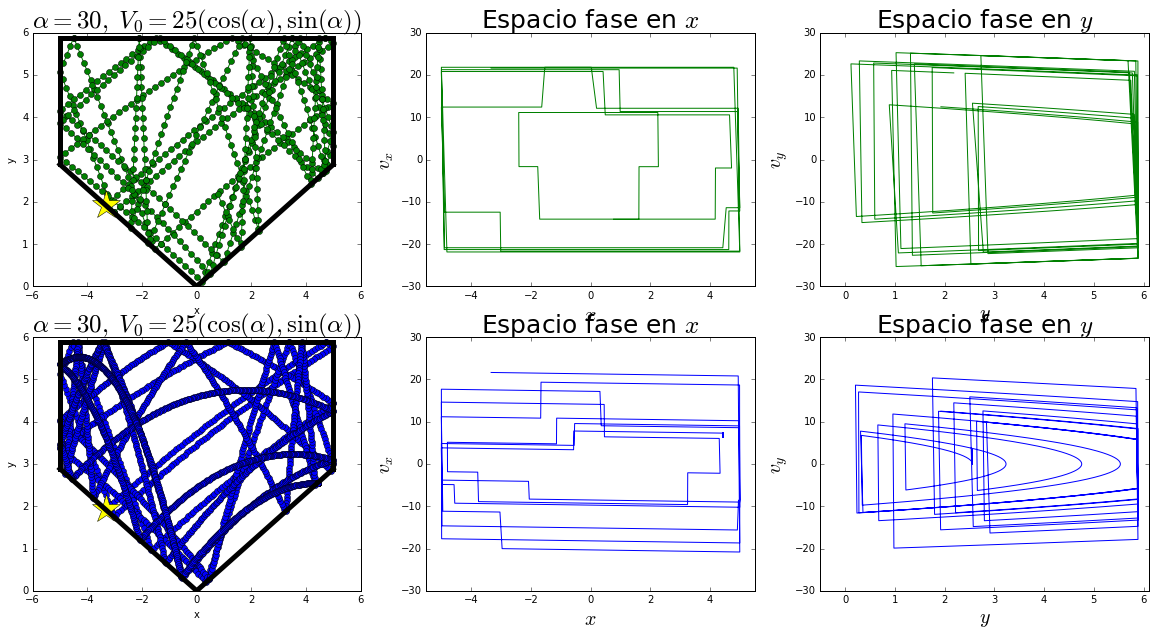

In [217]:
fig, ax = plt.subplots(figsize=(20,10))

angulo = 30
inicio = [-10./3,10.*tan(angulo*pi/180)/3, 25*cos(angulo*pi/180), 25*sin(angulo*pi/180)]
trayectoria = datos_graf(inicio,angulo,0,700,.01)


subplot(2,3, 1)
title(r'$\alpha = %s\; V_0=25 (\cos( \alpha),\sin(\alpha))$' %(str(angulo)+','),fontsize = 25)
xlabel('x'),ylabel('y')
plot(trayectoria[:,0],trayectoria[:,1],'o-',color = 'green')
plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
caja(equis, angulo)

subplot(2,3, 2), xlim([-5.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $x$ ',fontsize = 25)
xlabel(r'$x$',fontsize = 20),ylabel(r'$v_x$',fontsize = 20)
plot(trayectoria[:,0],trayectoria[:,2],'-',color = 'green')

subplot(2,3, 3), xlim([-.5,6.1]), ylim([-30,30])
title(r'Espacio fase en $y$ ',fontsize = 25)
xlabel(r'$y$',fontsize = 20),ylabel(r'$v_y$',fontsize = 20)
plot(trayectoria[:,1],trayectoria[:,3],'-',color = 'green')




trayectoria = datos_graf(inicio,angulo,fric_v,5000,.01/2)

subplot(2,3, 4) 
title(r'$\alpha = %s\; V_0=25 (\cos( \alpha),\sin(\alpha))$' %(str(angulo)+','),fontsize = 25)
xlabel('x'),ylabel('y')
plot(trayectoria[:,0],trayectoria[:,1],'o-')
plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
caja(equis, angulo)

subplot(2,3, 5),xlim([-5.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $x$ ',fontsize = 25)
xlabel(r'$x$',fontsize = 20),ylabel(r'$v_x$',fontsize = 20)
plot(trayectoria[:,0],trayectoria[:,2],'-')

subplot(2,3, 6),xlim([-.5,6.1]), ylim([-30,30])
title(r'Espacio fase en $y$ ',fontsize = 25)
xlabel(r'$y$',fontsize = 20),ylabel(r'$v_y$',fontsize = 20)
plot(trayectoria[:,1],trayectoria[:,3],'-')

show()

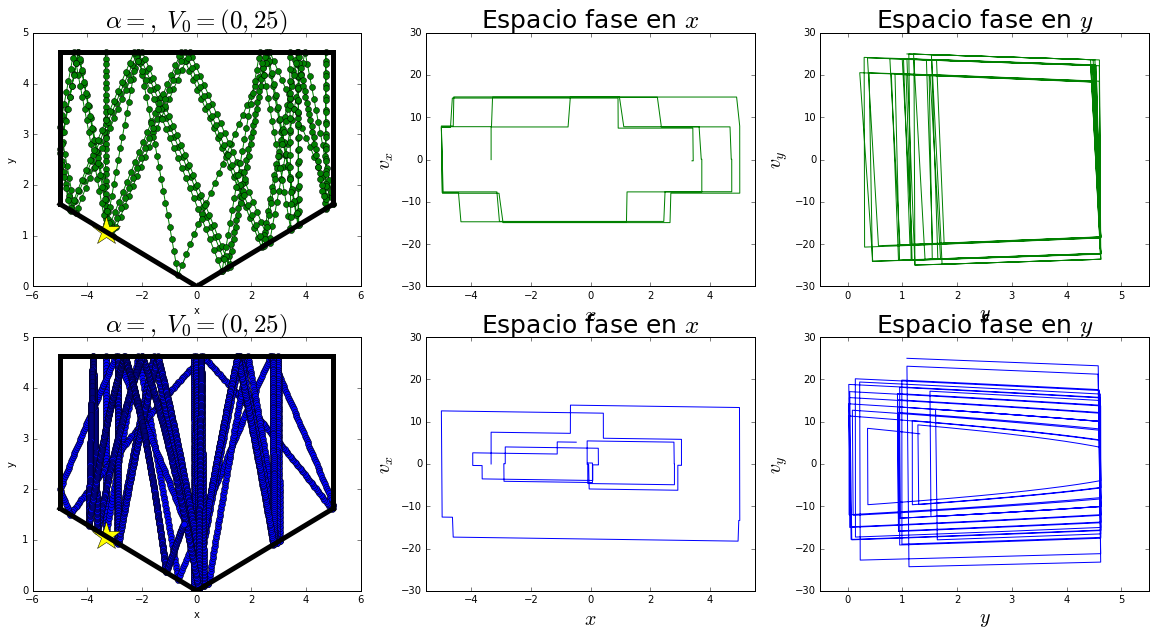

In [211]:
fig, ax = plt.subplots(figsize=(20,10))

angulo = 18
inicio = [-10./3,10.*tan(angulo*pi/180)/3, 0, 25]
trayectoria = datos_graf(inicio,angulo,0,700,.01)


subplot(2,3, 1)
title(r'$\alpha = %s\; V_0= (0,25)$' %(','),fontsize = 25)
xlabel('x'),ylabel('y')
plot(trayectoria[:,0],trayectoria[:,1],'o-',color = 'green')
plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
caja(equis, angulo)

subplot(2,3, 2), xlim([-5.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $x$ ',fontsize = 25)
xlabel(r'$x$',fontsize = 20),ylabel(r'$v_x$',fontsize = 20)
plot(trayectoria[:,0],trayectoria[:,2],'-',color = 'green')

subplot(2,3, 3), xlim([-.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $y$ ',fontsize = 25)
xlabel(r'$y$',fontsize = 20),ylabel(r'$v_y$',fontsize = 20)
plot(trayectoria[:,1],trayectoria[:,3],'-',color = 'green')




trayectoria = datos_graf(inicio,angulo,fric_v,5000,.01/4)

subplot(2,3, 4) 
title(r'$\alpha = %s\; V_0= (0,25)$' %(','),fontsize = 25)
xlabel('x'),ylabel('y')
plot(trayectoria[:,0],trayectoria[:,1],'o-')
plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
caja(equis, angulo)

subplot(2,3, 5),xlim([-5.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $x$ ',fontsize = 25)
xlabel(r'$x$',fontsize = 20),ylabel(r'$v_x$',fontsize = 20)
plot(trayectoria[:,0],trayectoria[:,2],'-')

subplot(2,3, 6),xlim([-.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $y$ ',fontsize = 25)
xlabel(r'$y$',fontsize = 20),ylabel(r'$v_y$',fontsize = 20)
plot(trayectoria[:,1],trayectoria[:,3],'-')

show()

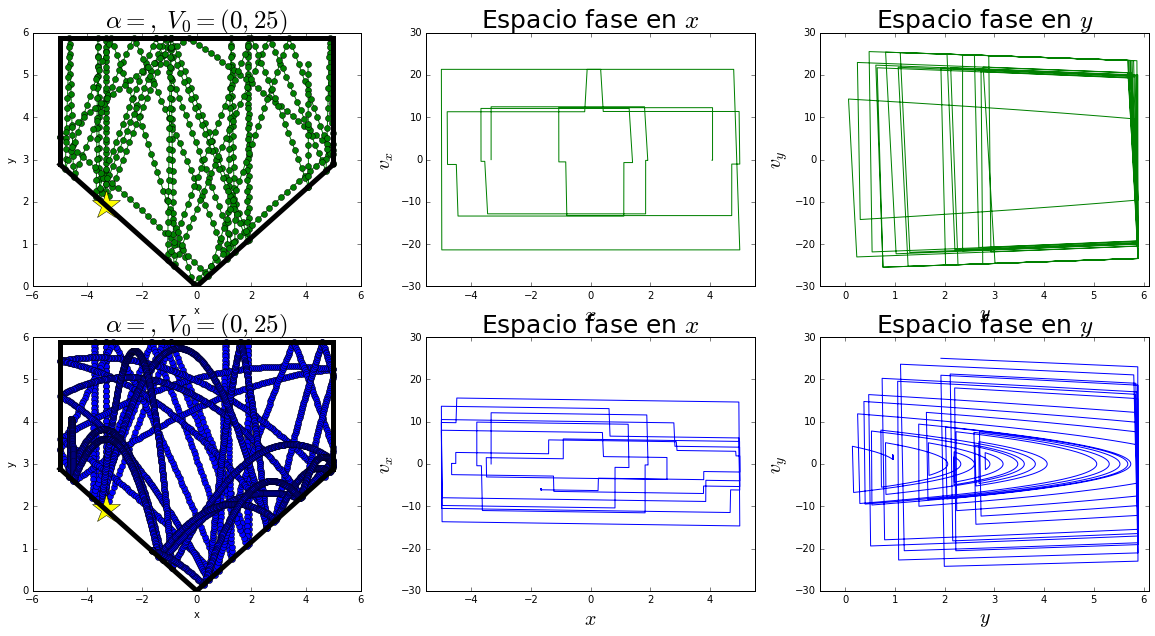

In [216]:
fig, ax = plt.subplots(figsize=(20,10))

angulo = 30
inicio = [-10./3,10.*tan(angulo*pi/180)/3, 0, 25]
trayectoria = datos_graf(inicio,angulo,0,700,.01)


subplot(2,3, 1)
title(r'$\alpha = %s\; V_0= (0,25)$' %(','),fontsize = 25)
xlabel('x'),ylabel('y')
plot(trayectoria[:,0],trayectoria[:,1],'o-',color = 'green')
plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
caja(equis, angulo)

subplot(2,3, 2), xlim([-5.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $x$ ',fontsize = 25)
xlabel(r'$x$',fontsize = 20),ylabel(r'$v_x$',fontsize = 20)
plot(trayectoria[:,0],trayectoria[:,2],'-',color = 'green')

subplot(2,3, 3), xlim([-.5,6.1]), ylim([-30,30])
title(r'Espacio fase en $y$ ',fontsize = 25)
xlabel(r'$y$',fontsize = 20),ylabel(r'$v_y$',fontsize = 20)
plot(trayectoria[:,1],trayectoria[:,3],'-',color = 'green')




trayectoria = datos_graf(inicio,angulo,fric_v,5000,.01/2)

subplot(2,3, 4) 
title(r'$\alpha = %s\; V_0= (0,25)$' %(','),fontsize = 25)
xlabel('x'),ylabel('y')
plot(trayectoria[:,0],trayectoria[:,1],'o-')
plot(inicio[0],inicio[1],'*',color='yellow',markersize=30)
caja(equis, angulo)

subplot(2,3, 5),xlim([-5.5,5.5]), ylim([-30,30])
title(r'Espacio fase en $x$ ',fontsize = 25)
xlabel(r'$x$',fontsize = 20),ylabel(r'$v_x$',fontsize = 20)
plot(trayectoria[:,0],trayectoria[:,2],'-')

subplot(2,3, 6),xlim([-.5,6.1]), ylim([-30,30])
title(r'Espacio fase en $y$ ',fontsize = 25)
xlabel(r'$y$',fontsize = 20),ylabel(r'$v_y$',fontsize = 20)
plot(trayectoria[:,1],trayectoria[:,3],'-')

show()

# Ejercicio 4

Ahora se hará rebotar una partícula en una caja circilar con radio interno $a$ y rardio externo $b=2a$. Se considerará como partícula libre y luego se aplicará un campo gravitacional uniforme.Del ejercicio 1 sacamos las ecuaciones de movimiento en coordenadas polares. Ahora igualando la fuerza a la de un potencial grvitacional se obtiene 

Sean $\hat{e_r} = \cos\theta \hat{e_x} + \sin\theta \hat{e_y},\, \hat{e_\theta} = -\sin\theta \hat{e_x} + \cos\theta \hat{e_y} \mbox{ y } r =\sqrt{x^2+y^2}$. 
Entonces
$\vec r = r \hat{e_r},\, \dot{\vec r} =\dot r \hat{e_r} + r\dot \theta \hat{e_\theta}\mbox{ y }\ddot{\vec r} = (\ddot r-r\dot\theta^2) \hat{e_r}+(2\dot r\dot\theta+r\ddot\theta) \hat{e_\theta}  $

$$ 
\begin{array}{c c r}
& m (\ddot r-r\dot\theta^2) = -m g \sin\theta& \mbox{en } \hat{e_r} \\
& m (2\dot r\dot\theta+r\ddot\theta) = -m g\cos\theta&  \mbox{en } \hat{e_\theta}\\
\end{array}
$$

Haciendo los cambios de variables $u_1 = r,\,v_1=\theta,\,u_2 = \dot r\mbox{ y }v_2 = \dot \theta$, el sistema a ecuaciones  a resolver es el siguiente:

\begin{align}
\left(\begin{array}{c} \dot u_1 \\ \dot v_1 \\ \dot u_2 \\ \dot v_2 \end{array} \right)=\left(\begin{array}{c} u_2 \\v_2 \\  v_2^2 u_1-g\sin v_1 \\ -(2\frac{ u_2}{u_1} v_2 + g \cos v_1)
\end{array}\right) 
\end{align}

Si queremos una partígula libre sólo se hace tender $g$ a cero

In [336]:
def e_mov_r(r, t, g=0.):  #r = [r, theta, dot r, dot theta]
    u1, v1, u2, v2 = r[0], r[1], r[2], r[3]  
   
    du1, dv1 = u2, v2
    du2 = v2*v2*u1 - g*sin(v1)
    dv2 = -2*(u2/u1)*v2 - g*cos(v1)/u1
        
    return array([du1, dv1, du2, dv2])

Notemos que como nunca se evaluará en el punto $r=0$, no fue necesario partir la ecuación en distintos casos.
Para poner la caja circular se usarán las siguientes funciones

In [337]:
def circ(r):
    ang = arange(- pi, pi , .1/2)
    return array([cos(ang),sin(ang)])*r

def caja_c(b):
    a = b/2.
    
    rext = circ(b)
    rint = circ(a)
    
    return plot(rext[0,:],rext[1,:],rint[0,:],rint[1,:],color = 'black',linewidth=5)

Al igual que en el ejercicio anterior, vamos a definir los rebotes. Dado que se usarán coordenadas polares, la reflexión de las velovidades siempre es en la velovidad radial y la angular se mantiene si cambios. Esto se debe a la simetría de la caja. Lo único que hay que hacer es saber si rebota en el radio exterior o el interior. Esto lo pondremo de forma explícita:

In [338]:
def rebote_c(r_v_i, radio, mi_dt, lado, gravedad=0.):  #Rebote con pared circular r=a. Lado indica si la partícula llega por afuera o por adentro
    dt_busqueda = mi_dt/2.  
    y_izq = r_v_i
    t,sol = rk4(e_mov_r,r_v_i,[0,dt_busqueda],gravedad)
    y_med = sol[-1,:]
    
    if lado =="adentro":
        while y_izq[0] > radio+1e-8 :
            if (y_izq[0]-radio)*(y_med[0]-radio)< 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(e_mov_r,reinicio,[0,dt_busqueda],gravedad)
            y_izq = reinicio
            y_med = sol[-1,:]
        
    if lado == "afuera":
        while y_izq[0] < radio+1e-8:
            if (y_izq[0]-radio)*(y_med[0]-radio)< 0:
                reinicio = y_izq
            else:
                reinicio = y_med
            dt_busqueda = dt_busqueda/2
            t,sol = rk4(e_mov_r,reinicio,[0,dt_busqueda],gravedad)
            y_izq = reinicio
            y_med = sol[-1,:]
            
    y_izq = array([y_izq[0],y_izq[1],-y_izq[2],y_izq[3]])  
    return y_izq

Y una vez más definimos nuestra función para que nos de los datos a graficar

In [339]:
def datos_graf_c(cond_ini, rext, gravedad=0., pts=100, dt=0.1):
    N = pts
    inicio = cond_ini
    rint = rext/2.
    trayectoria = zeros((N,len(inicio)))
    mi_dt = dt
    trayectoria[0,:] = array(inicio)
    
    for i in range(N-1):
        t,sol_dt = rk4(e_mov_r,trayectoria[i,:],[0,mi_dt], gravedad)
    
        if sol_dt[-1,:][0] > rext:   
            y_izq = rebote_c(trayectoria[i,:],rext,mi_dt,"adentro",gravedad)
            trayectoria[i+1,:]= y_izq
        elif sol_dt[-1,:][0] < rint:    
            y_izq = rebote_c(trayectoria[i,:],rint,mi_dt,"afuera",gravedad)
            trayectoria[i+1,:] = y_izq
        else:
            trayectoria[i+1,:]=sol_dt[-1,:]
    return trayectoria

Veamos cómo se ven las solucioes con y sin gravedad

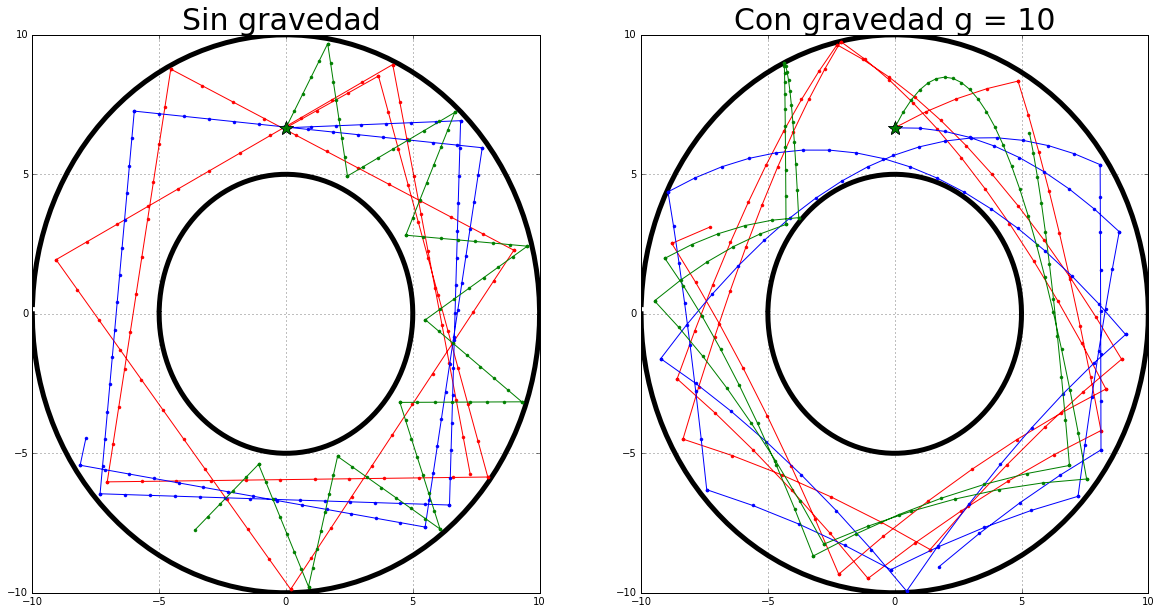

In [366]:
b=10

fig = figure(figsize=(20,10))

ax = fig.add_subplot(121)
caja_c(b), grid(True)

bx = fig.add_subplot(122)
caja_c(b),grid(True)

ax.set_title(r"Sin gravedad ", fontsize=30)
bx.set_title(r"Con gravedad g = 10", fontsize=30)

for i in xrange(3):
    cond_ini = [b*2./3.,pi/2,10*rand(),-pi*rand()]
    
    trayectoria = datos_graf_c(cond_ini,b)
    ax.plot(trayectoria[:,0]*cos(trayectoria[:,1]),trayectoria[:,0]*sin(trayectoria[:,1]),".-", color = colores[i])
    ax.plot(cond_ini[0]*cos(cond_ini[1]),cond_ini[0]*sin(cond_ini[1]),'*',color = colores[i], markersize =15)
    
    trayectoria = datos_graf_c(cond_ini,b,10)
    bx.plot(trayectoria[:,0]*cos(trayectoria[:,1]),trayectoria[:,0]*sin(trayectoria[:,1]),".-", color = colores[i])
    bx.plot(cond_ini[0]*cos(cond_ini[1]),cond_ini[0]*sin(cond_ini[1]),'*',color = colores[i], markersize =15)

show()

En el caso de la partícula libre, si se tienen las condiciones inciales tales que no exista una velocidad angular y sólo radial, a partícula se quedará encasillada:

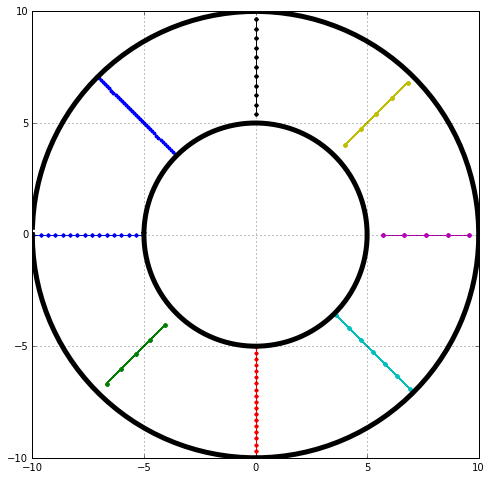

In [370]:
b= 10
ang = arange(-pi,pi,pi/4)

fig, ax = plt.subplots(figsize=(8, 8))
for i in xrange(len(ang)):
    cond_ini = [b*2./3., ang[i], 10*rand(),0]
    trayectoria = datos_graf_c(cond_ini,b)
    ax.plot(trayectoria[:,0]*cos(trayectoria[:,1]),trayectoria[:,0]*sin(trayectoria[:,1]),".-")
caja_c(b)
grid(True)
show()    